In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from pandas.api.types import is_string_dtype
from sklearn.feature_selection import RFE
from statistics import mode
from statistics import mean

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None) 

In [3]:
df = pd.read_csv('loan.csv')

In [4]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

In [5]:
df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [6]:
df.shape

(2260668, 145)

In [7]:
df.isnull().sum()

id                                            2260668
member_id                                     2260668
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
term                                                0
int_rate                                            0
installment                                         0
grade                                               0
sub_grade                                           0
emp_title                                      166969
emp_length                                     146907
home_ownership                                      0
annual_inc                                          4
verification_status                                 0
issue_d                                             0
loan_status                                         0
pymnt_plan                                          0
url                         

In [8]:
paid = ["Does not meet the credit policy. Status:Fully Paid", "Fully Paid"]

# good_loan -1 bad_loan - 0
not_paid = ['Does not meet the credit policy. Status:Charged Off', 'Charged Off','Default']

df['loan_condition'] = np.nan

def loan_type(status):
    if status in not_paid:
        return 0
    elif status in paid:
        return 1

df['current_loan_status']=df['loan_status'].apply(loan_type)

In [9]:
df.groupby(by=['current_loan_status']).count()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_condition
current_loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,262447,262447,262447,262447,262447,262447,262447,262447,240701,242035,262447,262447,262447,262447,262447,262447,0,19605,262447,257717,262447,262447,262385,262444,262444,262444,134779,50965,262444,262444,262447,262273,262444,262447,262447,262447,262447,262447,262447,262447,262447,262447,262447,260174,262447,792,262438,262419,75511,262447,262447,5736,5736,5717,262444,251368,251368,113813,113813,113813,113813,110268,113813,99566,113813,113813,113813,113805,251368,113813,113813,113813,254800,251362,251947,251784,262419,262444,243404,251367,251367,251368,254800,252144,65253,236348,90690,251368,251368,251368,253422,251368,251368,251368,251368,251368,253422,238243,251368,251368,251368,251346,251871,262113,262436,251368,254800,254800,251368,4058,4058,4058,4058,4058,3928,4058,4058,4058,4058,1781,262447,3817,3817,3817,3817,3817,3817,3817,3817,3817,3817,3817,2004,3817,3817,262447,262447,31999,31999,31999,31999,31999,31999,0
1.0,0,0,1043940,1043940,1043940,1043940,1043940,1043940,1043940,1043940,982945,988861,1043940,1043936,1043940,1043940,1043940,1043940,0,106143,1043940,1033241,1043939,1043940,1043690,1043914,1043914,1043913,512576,171668,1043914,1043914,1043940,1043264,1043914,1043940,1043940,1043940,1043940,1043940,1043940,1043940,1043940,1043940,1043940,1043940,1043940,1988,1043893,1043823,266868,1043940,1043940,17508,17506,17381,1043914,984743,984743,385762,385763,385763,385763,376311,385763,333129,385763,385763,385763,385720,984743,385763,385762,385762,1001557,984728,991051,990467,10438

In [10]:
df2 = df[df['current_loan_status'].isin([0,1])]
df2.count()

id                                                  0
member_id                                           0
loan_amnt                                     1306387
funded_amnt                                   1306387
funded_amnt_inv                               1306387
term                                          1306387
int_rate                                      1306387
installment                                   1306387
grade                                         1306387
sub_grade                                     1306387
emp_title                                     1223646
emp_length                                    1230896
home_ownership                                1306387
annual_inc                                    1306383
verification_status                           1306387
issue_d                                       1306387
loan_status                                   1306387
pymnt_plan                                    1306387
url                         

current_loan_status
1.0    1043940
0.0     262447
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Current Loan Status')

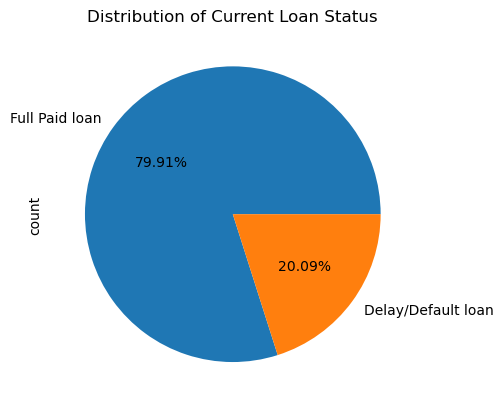

In [11]:
print(df['current_loan_status'].value_counts())
df['current_loan_status'].value_counts().plot(kind='pie',autopct='%1.2f%%', labels=['Full Paid loan','Delay/Default loan'])
plt.title('Distribution of Current Loan Status')

In [12]:
#Undersample the data
# Calculate 20% of the total rows
sample_size = int(0.2 * len(df2))

# Desired proportions
prop_1 = 0.7991
prop_0 = 0.2009

# Calculate the number of samples needed for each loan_status
sample_size_1 = int(sample_size * prop_1)
sample_size_0 = int(sample_size * prop_0)

# Separate the dataset by loan_status
df_1 = df2[df2['current_loan_status'] == 1]
df_0 = df2[df2['current_loan_status'] == 0]

# Perform undersampling
undersampled_df_1 = df_1.sample(n=sample_size_1, random_state=42)
undersampled_df_0 = df_0.sample(n=sample_size_0, random_state=42)

# Combine the undersampled dataframes
undersampled_df = pd.concat([undersampled_df_1, undersampled_df_0])

# Shuffle the undersampled dataset to mix the rows
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the undersampled dataset to a new CSV file
undersampled_df.to_csv('final_undersampled_df_change.csv', index=False)

print(f'Original dataset size: {len(df)}')
print(f'Undersampled dataset size: {len(undersampled_df)}')
print(f'Number of loan_status 1: {undersampled_df["current_loan_status"].value_counts()[1]}')
print(f'Number of loan_status 0: {undersampled_df["current_loan_status"].value_counts()[0]}')

Original dataset size: 2260668
Undersampled dataset size: 261276
Number of loan_status 1: 208786
Number of loan_status 0: 52490


In [13]:
undersampled_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_condition,current_loan_status
0,NaN,NaN,11925,11925,11925.0,36 months,11.53,393.41,B,B5,Firefighter,7 years,MORTGAGE,55000.0,Source Verified,Apr-2015,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,342xx,FL,22.89,0.0,Feb-2006,0.0,NaN,NaN,6.0,0.0,1499,14.0,12.0,f,0.0,0.0,14147.439043,14147.44,11925.00,2222.44,0.0,0.0,0.0,May-2018,393.37,NaN,Apr-2018,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,46859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10700.0,NaN,NaN,NaN,2.0,9372.0,9201.0,14.0,0.0,0.0,110.0,109.0,18.0,3.0,0.0,18.0,NaN,18.0,NaN,0.0,3.0,3.0,3.0,4.0,4.0,4.0,8.0,3.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,72036.0,46859.0,10700.0,61336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,3000,3000,3000.0,36 months,18.75,109.59,D,D3,NaN,NaN,MORTGAGE,65000.0,Verified,Dec-2012,Fully Paid,n,NaN,Borrower added on 12/06/12 > Funds are to pay unexpected funeral expenses that must be paid in full. Thank you.<br>,other,Funeral expenses for mother,070xx,NJ,27.31,0.0,Jan-1994,0.0,NaN,NaN,13.0,0.0,39527,87.8,29.0,f,0.0,0.0,3945.203251,3945.20,3000.00,945.20,0.0,0.0,0.0,Dec-2015,109.55,NaN,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,200243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000.0,NaN,NaN,NaN,3.0,16687.0,333.0,98.6,0.0,0.0,167.0,230.0,2.0,2.0,1.0,55.0,NaN,19.0,NaN,0.0,5.0,8.0,5.0,10.0,11.0,10.0,17.0,8.0,13.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,222208.0,53288.0,23500.0,27423.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,NaN,NaN,28775,28775,28775.0,60 mont

In [14]:
undersampled_df.current_loan_status.value_counts()

current_loan_status
1.0    208786
0.0     52490
Name: count, dtype: int64

In [15]:
undersampled_df.shape

(261276, 147)

In [16]:
undersampled_df.isnull().sum()

id                                            261276
member_id                                     261276
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      16456
emp_length                                     15040
home_ownership                                     0
annual_inc                                         1
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [17]:
max_missing = undersampled_df.columns[(round(undersampled_df.isnull().sum()/len(undersampled_df.index), 2)*100)>70]
max_missing

Index(['id', 'member_id', 'url', 'desc', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'mths_since_recent_bc_dlq',
       'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',


In [18]:
undersampled_df.drop(columns=max_missing,axis=1,inplace=True)

In [19]:
undersampled_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status
0,11925,11925,11925.0,36 months,11.53,393.41,B,B5,Firefighter,7 years,MORTGAGE,55000.0,Source Verified,Apr-2015,Fully Paid,n,debt_consolidation,Debt consolidation,342xx,FL,22.89,0.0,Feb-2006,0.0,NaN,6.0,0.0,1499,14.0,12.0,f,0.0,0.0,14147.439043,14147.44,11925.00,2222.44,0.0,0.0,0.0,May-2018,393.37,Apr-2018,0.0,1,Individual,0.0,0.0,46859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10700.0,NaN,NaN,NaN,2.0,9372.0,9201.0,14.0,0.0,0.0,110.0,109.0,18.0,3.0,0.0,18.0,18.0,NaN,0.0,3.0,3.0,3.0,4.0,4.0,4.0,8.0,3.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,72036.0,46859.0,10700.0,61336.0,N,Cash,N,1.0
1,3000,3000,3000.0,36 months,18.75,109.59,D,D3,NaN,NaN,MORTGAGE,65000.0,Verified,Dec-2012,Fully Paid,n,other,Funeral expenses for mother,070xx,NJ,27.31,0.0,Jan-1994,0.0,NaN,13.0,0.0,39527,87.8,29.0,f,0.0,0.0,3945.203251,3945.20,3000.00,945.20,0.0,0.0,0.0,Dec-2015,109.55,Feb-2019,0.0,1,Individual,0.0,0.0,200243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000.0,NaN,NaN,NaN,3.0,16687.0,333.0,98.6,0.0,0.0,167.0,230.0,2.0,2.0,1.0,55.0,19.0,NaN,0.0,5.0,8.0,5.0,10.0,11.0,10.0,17.0,8.0,13.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,222208.0,53288.0,23500.0,27423.0,N,Cash,N,1.0
2,28775,28775,28775.0,60 months,15.61,693.81,D,D1,Store Manager,6 years,RENT,60000.0,Source Verified,May-2014,Fully Paid,n,debt_consolidation,Debt consolidation,974xx,OR,25.36,0.0,Jan-1999,1.0,41.0,11.0,0.0,19022,55.1,41.0,w,0.0,0.0,29560.220000,29560.22,28775.00,785.22,0.0,0.0,0.0,Sep-2014,3172.60,Dec-2018,0.0,1,Individual,0.0,0.0,59859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34500.0,NaN,NaN,NaN,7.0,5442.0,11437.0,61.2,0.0,0.0,184.0,134.0,2.0,2.0,2.0,5.0,0.0,NaN,0.0,4.0,6.0,4.0,18.0,14.0,7.0,25.0,6.0,11.0,0.0,0.0,0.0,4.0,97.6,25.0,0.0,0.0,87357.0,59859.0,29500.0,52857.0,N,Cash,N,1.0
3,10000,10000,10000.0,36 months,13.58,339.74,C,C2,Unit secretary/monitor tech,10+ years,RENT,36000.0,Not Verified,Mar-2018,Fully Paid,n,credit_card,Credit card refinancing,173xx,PA,29.20,0.0,Jan-2011,1.0,29.0,8.0,1.0,9491,62.4,17.0,w,0.0,0.0,10753.265620,10753.27,10000.00,753.27,0.0,0.0,0.0,Oct-2018,8708.31,Oct-2018,0.0,1,Individual,0.0,0.0,38344.0,1.0,2.0,0.0,2.0,17.0,28853.0,81.0,1.0,2.0,3142.0,75.0,15200.0,1.0,3.0,1.0,4.0,5478.0,158.0,95.2,0.0,0.0,72.0,86.0,4.0,4.0,0.0,86.0,4.0,29.0,0.0,1.0,4.0,1.0,3.0,5.0,6.0,12.0,4.0,8.0,0.0,0.0,0.0,1.0,94.1,100.0,1.0,0.0,50831.0,38344.0,3300.0,35631.0,N,DirectPay,N,1.0
4,10075,10075,10075.0,60 months,18.99,261.30,E,E3,court clerk 11,10+ years,RENT,38000.0,Verified,Dec-2015,Charged Off,n,other,Oth

In [20]:
undersampled_df.drop(columns = ["funded_amnt", "funded_amnt_inv"], axis=1,inplace=True)

In [21]:
undersampled_df.drop(columns = ["zip_code", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "last_pymnt_d", "last_credit_pull_d"], axis=1,inplace=True)

In [22]:
undersampled_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status
0,11925,36 months,11.53,393.41,B,B5,Firefighter,7 years,MORTGAGE,55000.0,Source Verified,Apr-2015,Fully Paid,n,debt_consolidation,Debt consolidation,FL,22.89,0.0,Feb-2006,0.0,NaN,6.0,0.0,1499,14.0,12.0,f,0.0,0.0,2222.44,0.0,0.0,0.0,393.37,0.0,1,Individual,0.0,0.0,46859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10700.0,NaN,NaN,NaN,2.0,9372.0,9201.0,14.0,0.0,0.0,110.0,109.0,18.0,3.0,0.0,18.0,18.0,NaN,0.0,3.0,3.0,3.0,4.0,4.0,4.0,8.0,3.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,72036.0,46859.0,10700.0,61336.0,N,Cash,N,1.0
1,3000,36 months,18.75,109.59,D,D3,NaN,NaN,MORTGAGE,65000.0,Verified,Dec-2012,Fully Paid,n,other,Funeral expenses for mother,NJ,27.31,0.0,Jan-1994,0.0,NaN,13.0,0.0,39527,87.8,29.0,f,0.0,0.0,945.20,0.0,0.0,0.0,109.55,0.0,1,Individual,0.0,0.0,200243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000.0,NaN,NaN,NaN,3.0,16687.0,333.0,98.6,0.0,0.0,167.0,230.0,2.0,2.0,1.0,55.0,19.0,NaN,0.0,5.0,8.0,5.0,10.0,11.0,10.0,17.0,8.0,13.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,222208.0,53288.0,23500.0,27423.0,N,Cash,N,1.0
2,28775,60 months,15.61,693.81,D,D1,Store Manager,6 years,RENT,60000.0,Source Verified,May-2014,Fully Paid,n,debt_consolidation,Debt consolidation,OR,25.36,0.0,Jan-1999,1.0,41.0,11.0,0.0,19022,55.1,41.0,w,0.0,0.0,785.22,0.0,0.0,0.0,3172.60,0.0,1,Individual,0.0,0.0,59859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34500.0,NaN,NaN,NaN,7.0,5442.0,11437.0,61.2,0.0,0.0,184.0,134.0,2.0,2.0,2.0,5.0,0.0,NaN,0.0,4.0,6.0,4.0,18.0,14.0,7.0,25.0,6.0,11.0,0.0,0.0,0.0,4.0,97.6,25.0,0.0,0.0,87357.0,59859.0,29500.0,52857.0,N,Cash,N,1.0
3,10000,36 months,13.58,339.74,C,C2,Unit secretary/monitor tech,10+ years,RENT,36000.0,Not Verified,Mar-2018,Fully Paid,n,credit_card,Credit card refinancing,PA,29.20,0.0,Jan-2011,1.0,29.0,8.0,1.0,9491,62.4,17.0,w,0.0,0.0,753.27,0.0,0.0,0.0,8708.31,0.0,1,Individual,0.0,0.0,38344.0,1.0,2.0,0.0,2.0,17.0,28853.0,81.0,1.0,2.0,3142.0,75.0,15200.0,1.0,3.0,1.0,4.0,5478.0,158.0,95.2,0.0,0.0,72.0,86.0,4.0,4.0,0.0,86.0,4.0,29.0,0.0,1.0,4.0,1.0,3.0,5.0,6.0,12.0,4.0,8.0,0.0,0.0,0.0,1.0,94.1,100.0,1.0,0.0,50831.0,38344.0,3300.0,35631.0,N,DirectPay,N,1.0
4,10075,60 months,18.99,261.30,E,E3,court clerk 11,10+ years,RENT,38000.0,Verified,Dec-2015,Charged Off,n,other,Other,MI,36.92,0.0,Mar-1998,0.0,44.0,11.0,0.0,4533,42.8,19.0,w,0.0,0.0,4339.55,30.0,0.0,0.0,50.00,0.0,1,Individual,0.0,255.0,30100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10600.0,NaN,NaN,NaN,7.0,2736.0,2553.0,50.9,0.0,0.0,212.0,102.0,7.0,7.0,1.0,43.0,11.0,NaN,2.0,2.0,5.0,3.0,3.0,9.0,8.0,9.0,5.0,11.0,0.0,0.0,0.0,5.0,84.2,66.7,0.0,0.0,45555.0,30100.0,5200.0,34955.0,N,Cash,Y,0.0


In [23]:
undersampled_df.shape

(261276, 96)

In [24]:
undersampled_df2 = undersampled_df.copy()

In [25]:
state_to_timezone = {
    'GA': 'Eastern', 'CA': 'Pacific', 'TX': 'Central', 'MS': 'Central', 'IN': 'Eastern',
    'VA': 'Eastern', 'NJ': 'Eastern', 'OR': 'Pacific', 'PA': 'Eastern', 'AZ': 'Mountain',
    'MN': 'Central', 'CO': 'Mountain', 'CT': 'Eastern', 'NY': 'Eastern', 'SC': 'Eastern',
    'KY': 'Eastern', 'OH': 'Eastern', 'NC': 'Eastern', 'OK': 'Central', 'AR': 'Central',
    'AL': 'Central', 'NV': 'Pacific', 'FL': 'Eastern', 'MO': 'Central', 'NM': 'Mountain',
    'IL': 'Central', 'MA': 'Eastern', 'LA': 'Central', 'MD': 'Eastern', 'WI': 'Central',
    'MI': 'Eastern', 'RI': 'Eastern', 'SD': 'Central', 'WA': 'Pacific', 'ID': 'Mountain',
    'TN': 'Central', 'UT': 'Mountain', 'KS': 'Central', 'HI': 'Hawaii-Aleutian', 'NH': 'Eastern',
    'DE': 'Eastern', 'NE': 'Central', 'ND': 'Central', 'MT': 'Mountain', 'WY': 'Mountain',
    'ME': 'Eastern', 'DC': 'Eastern', 'WV': 'Eastern', 'AK': 'Alaska', 'VT': 'Eastern',
    'IA': 'Central'
}

In [26]:
undersampled_df2['region'] = undersampled_df2['addr_state'].map(state_to_timezone)

In [27]:
undersampled_df2.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status,region
0,11925,36 months,11.53,393.41,B,B5,Firefighter,7 years,MORTGAGE,55000.0,Source Verified,Apr-2015,Fully Paid,n,debt_consolidation,Debt consolidation,FL,22.89,0.0,Feb-2006,0.0,NaN,6.0,0.0,1499,14.0,12.0,f,0.0,0.0,2222.44,0.0,0.0,0.0,393.37,0.0,1,Individual,0.0,0.0,46859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10700.0,NaN,NaN,NaN,2.0,9372.0,9201.0,14.0,0.0,0.0,110.0,109.0,18.0,3.0,0.0,18.0,18.0,NaN,0.0,3.0,3.0,3.0,4.0,4.0,4.0,8.0,3.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,72036.0,46859.0,10700.0,61336.0,N,Cash,N,1.0,Eastern
1,3000,36 months,18.75,109.59,D,D3,NaN,NaN,MORTGAGE,65000.0,Verified,Dec-2012,Fully Paid,n,other,Funeral expenses for mother,NJ,27.31,0.0,Jan-1994,0.0,NaN,13.0,0.0,39527,87.8,29.0,f,0.0,0.0,945.20,0.0,0.0,0.0,109.55,0.0,1,Individual,0.0,0.0,200243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000.0,NaN,NaN,NaN,3.0,16687.0,333.0,98.6,0.0,0.0,167.0,230.0,2.0,2.0,1.0,55.0,19.0,NaN,0.0,5.0,8.0,5.0,10.0,11.0,10.0,17.0,8.0,13.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,222208.0,53288.0,23500.0,27423.0,N,Cash,N,1.0,Eastern
2,28775,60 months,15.61,693.81,D,D1,Store Manager,6 years,RENT,60000.0,Source Verified,May-2014,Fully Paid,n,debt_consolidation,Debt consolidation,OR,25.36,0.0,Jan-1999,1.0,41.0,11.0,0.0,19022,55.1,41.0,w,0.0,0.0,785.22,0.0,0.0,0.0,3172.60,0.0,1,Individual,0.0,0.0,59859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34500.0,NaN,NaN,NaN,7.0,5442.0,11437.0,61.2,0.0,0.0,184.0,134.0,2.0,2.0,2.0,5.0,0.0,NaN,0.0,4.0,6.0,4.0,18.0,14.0,7.0,25.0,6.0,11.0,0.0,0.0,0.0,4.0,97.6,25.0,0.0,0.0,87357.0,59859.0,29500.0,52857.0,N,Cash,N,1.0,Pacific
3,10000,36 months,13.58,339.74,C,C2,Unit secretary/monitor tech,10+ years,RENT,36000.0,Not Verified,Mar-2018,Fully Paid,n,credit_card,Credit card refinancing,PA,29.20,0.0,Jan-2011,1.0,29.0,8.0,1.0,9491,62.4,17.0,w,0.0,0.0,753.27,0.0,0.0,0.0,8708.31,0.0,1,Individual,0.0,0.0,38344.0,1.0,2.0,0.0,2.0,17.0,28853.0,81.0,1.0,2.0,3142.0,75.0,15200.0,1.0,3.0,1.0,4.0,5478.0,158.0,95.2,0.0,0.0,72.0,86.0,4.0,4.0,0.0,86.0,4.0,29.0,0.0,1.0,4.0,1.0,3.0,5.0,6.0,12.0,4.0,8.0,0.0,0.0,0.0,1.0,94.1,100.0,1.0,0.0,50831.0,38344.0,3300.0,35631.0,N,DirectPay,N,1.0,Eastern
4,10075,60 months,18.99,261.30,E,E3,court clerk 11,10+ years,RENT,38000.0,Verified,Dec-2015,Charged Off,n,other,Other,MI,36.92,0.0,Mar-1998,0.0,44.0,11.0,0.0,4533,42.8,19.0,w,0.0,0.0,4339.55,30.0,0.0,0.0,50.00,0.0,1,Individual,0.0,255.0,30100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10600.0,NaN,NaN,NaN,7.0,2736.0,2553.0,50.9,0.0,0.0,212.0,102.0,7.0,7.0,1.0,43.0,11.0,NaN,2.0,2.0,5.0,3.0,3.0,9.0,8.0,9.0,5.0,11.0,0.0,0.0,0.0,5.0,84.2,66.7,0.0,0.0,45555.0,30100.0,5200.

In [28]:
undersampled_df2.drop(columns="addr_state", axis=1,inplace=True)

In [29]:
undersampled_df2.shape

(261276, 96)

In [30]:
undersampled_df2['earliest_cr_line'] = pd.to_datetime(undersampled_df2['earliest_cr_line'])
undersampled_df2['issue_d'] = pd.to_datetime(undersampled_df2['issue_d'])

undersampled_df2['months_to_issue'] =(undersampled_df2['issue_d'] - undersampled_df2['earliest_cr_line']).dt.days / 30
undersampled_df2['months_to_issue'] = undersampled_df2['months_to_issue'].fillna(0).astype(int)

In [31]:
undersampled_df2.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status,region,months_to_issue
0,11925,36 months,11.53,393.41,B,B5,Firefighter,7 years,MORTGAGE,55000.0,Source Verified,2015-04-01,Fully Paid,n,debt_consolidation,Debt consolidation,22.89,0.0,2006-02-01,0.0,NaN,6.0,0.0,1499,14.0,12.0,f,0.0,0.0,2222.44,0.0,0.0,0.0,393.37,0.0,1,Individual,0.0,0.0,46859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10700.0,NaN,NaN,NaN,2.0,9372.0,9201.0,14.0,0.0,0.0,110.0,109.0,18.0,3.0,0.0,18.0,18.0,NaN,0.0,3.0,3.0,3.0,4.0,4.0,4.0,8.0,3.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,72036.0,46859.0,10700.0,61336.0,N,Cash,N,1.0,Eastern,111
1,3000,36 months,18.75,109.59,D,D3,NaN,NaN,MORTGAGE,65000.0,Verified,2012-12-01,Fully Paid,n,other,Funeral expenses for mother,27.31,0.0,1994-01-01,0.0,NaN,13.0,0.0,39527,87.8,29.0,f,0.0,0.0,945.20,0.0,0.0,0.0,109.55,0.0,1,Individual,0.0,0.0,200243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000.0,NaN,NaN,NaN,3.0,16687.0,333.0,98.6,0.0,0.0,167.0,230.0,2.0,2.0,1.0,55.0,19.0,NaN,0.0,5.0,8.0,5.0,10.0,11.0,10.0,17.0,8.0,13.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,222208.0,53288.0,23500.0,27423.0,N,Cash,N,1.0,Eastern,230
2,28775,60 months,15.61,693.81,D,D1,Store Manager,6 years,RENT,60000.0,Source Verified,2014-05-01,Fully Paid,n,debt_consolidation,Debt consolidation,25.36,0.0,1999-01-01,1.0,41.0,11.0,0.0,19022,55.1,41.0,w,0.0,0.0,785.22,0.0,0.0,0.0,3172.60,0.0,1,Individual,0.0,0.0,59859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34500.0,NaN,NaN,NaN,7.0,5442.0,11437.0,61.2,0.0,0.0,184.0,134.0,2.0,2.0,2.0,5.0,0.0,NaN,0.0,4.0,6.0,4.0,18.0,14.0,7.0,25.0,6.0,11.0,0.0,0.0,0.0,4.0,97.6,25.0,0.0,0.0,87357.0,59859.0,29500.0,52857.0,N,Cash,N,1.0,Pacific,186
3,10000,36 months,13.58,339.74,C,C2,Unit secretary/monitor tech,10+ years,RENT,36000.0,Not Verified,2018-03-01,Fully Paid,n,credit_card,Credit card refinancing,29.20,0.0,2011-01-01,1.0,29.0,8.0,1.0,9491,62.4,17.0,w,0.0,0.0,753.27,0.0,0.0,0.0,8708.31,0.0,1,Individual,0.0,0.0,38344.0,1.0,2.0,0.0,2.0,17.0,28853.0,81.0,1.0,2.0,3142.0,75.0,15200.0,1.0,3.0,1.0,4.0,5478.0,158.0,95.2,0.0,0.0,72.0,86.0,4.0,4.0,0.0,86.0,4.0,29.0,0.0,1.0,4.0,1.0,3.0,5.0,6.0,12.0,4.0,8.0,0.0,0.0,0.0,1.0,94.1,100.0,1.0,0.0,50831.0,38344.0,3300.0,35631.0,N,DirectPay,N,1.0,Eastern,87
4,10075,60 months,18.99,261.30,E,E3,court clerk 11,10+ years,RENT,38000.0,Verified,2015-12-01,Charged Off,n,other,Other,36.92,0.0,1998-03-01,0.0,44.0,11.0,0.0,4533,42.8,19.0,w,0.0,0.0,4339.55,30.0,0.0,0.0,50.00,0.0,1,Individual,0.0,255.0,30100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10600.0,NaN,NaN,NaN,7.0,2736.0,2553.0,50.9,0.0,0.0,212.0,102.0,7.0,7.0,1.0,43.0,11.0,NaN,2.0,2.0,5.0,3.0,3.0,9.0,8.0,9.0,5.0,11.0,0.0,0.0,0.0,5.0,84.2,66.7,0.0,

In [32]:
undersampled_df2.drop(columns="loan_status", axis=1, inplace=True)

In [33]:
undersampled_df2.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status,region,months_to_issue
0,11925,36 months,11.53,393.41,B,B5,Firefighter,7 years,MORTGAGE,55000.0,Source Verified,2015-04-01,n,debt_consolidation,Debt consolidation,22.89,0.0,2006-02-01,0.0,NaN,6.0,0.0,1499,14.0,12.0,f,0.0,0.0,2222.44,0.0,0.0,0.0,393.37,0.0,1,Individual,0.0,0.0,46859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10700.0,NaN,NaN,NaN,2.0,9372.0,9201.0,14.0,0.0,0.0,110.0,109.0,18.0,3.0,0.0,18.0,18.0,NaN,0.0,3.0,3.0,3.0,4.0,4.0,4.0,8.0,3.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,72036.0,46859.0,10700.0,61336.0,N,Cash,N,1.0,Eastern,111
1,3000,36 months,18.75,109.59,D,D3,NaN,NaN,MORTGAGE,65000.0,Verified,2012-12-01,n,other,Funeral expenses for mother,27.31,0.0,1994-01-01,0.0,NaN,13.0,0.0,39527,87.8,29.0,f,0.0,0.0,945.20,0.0,0.0,0.0,109.55,0.0,1,Individual,0.0,0.0,200243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000.0,NaN,NaN,NaN,3.0,16687.0,333.0,98.6,0.0,0.0,167.0,230.0,2.0,2.0,1.0,55.0,19.0,NaN,0.0,5.0,8.0,5.0,10.0,11.0,10.0,17.0,8.0,13.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,222208.0,53288.0,23500.0,27423.0,N,Cash,N,1.0,Eastern,230
2,28775,60 months,15.61,693.81,D,D1,Store Manager,6 years,RENT,60000.0,Source Verified,2014-05-01,n,debt_consolidation,Debt consolidation,25.36,0.0,1999-01-01,1.0,41.0,11.0,0.0,19022,55.1,41.0,w,0.0,0.0,785.22,0.0,0.0,0.0,3172.60,0.0,1,Individual,0.0,0.0,59859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34500.0,NaN,NaN,NaN,7.0,5442.0,11437.0,61.2,0.0,0.0,184.0,134.0,2.0,2.0,2.0,5.0,0.0,NaN,0.0,4.0,6.0,4.0,18.0,14.0,7.0,25.0,6.0,11.0,0.0,0.0,0.0,4.0,97.6,25.0,0.0,0.0,87357.0,59859.0,29500.0,52857.0,N,Cash,N,1.0,Pacific,186
3,10000,36 months,13.58,339.74,C,C2,Unit secretary/monitor tech,10+ years,RENT,36000.0,Not Verified,2018-03-01,n,credit_card,Credit card refinancing,29.20,0.0,2011-01-01,1.0,29.0,8.0,1.0,9491,62.4,17.0,w,0.0,0.0,753.27,0.0,0.0,0.0,8708.31,0.0,1,Individual,0.0,0.0,38344.0,1.0,2.0,0.0,2.0,17.0,28853.0,81.0,1.0,2.0,3142.0,75.0,15200.0,1.0,3.0,1.0,4.0,5478.0,158.0,95.2,0.0,0.0,72.0,86.0,4.0,4.0,0.0,86.0,4.0,29.0,0.0,1.0,4.0,1.0,3.0,5.0,6.0,12.0,4.0,8.0,0.0,0.0,0.0,1.0,94.1,100.0,1.0,0.0,50831.0,38344.0,3300.0,35631.0,N,DirectPay,N,1.0,Eastern,87
4,10075,60 months,18.99,261.30,E,E3,court clerk 11,10+ years,RENT,38000.0,Verified,2015-12-01,n,other,Other,36.92,0.0,1998-03-01,0.0,44.0,11.0,0.0,4533,42.8,19.0,w,0.0,0.0,4339.55,30.0,0.0,0.0,50.00,0.0,1,Individual,0.0,255.0,30100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10600.0,NaN,NaN,NaN,7.0,2736.0,2553.0,50.9,0.0,0.0,212.0,102.0,7.0,7.0,1.0,43.0,11.0,NaN,2.0,2.0,5.0,3.0,3.0,9.0,8.0,9.0,5.0,11.0,0.0,0.0,0.0,5.0,84.2,66.7,0.0,0.0,45555.0,30100.0,5200.0,34955.0,N,Cash,Y,0.0,Eastern,216


In [34]:
undersampled_df2.shape

(261276, 96)

In [35]:
undersampled_df2['term'] = undersampled_df2['term'].astype(str).str.replace(' months', '').astype(int)

In [36]:
undersampled_df2.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status,region,months_to_issue
0,11925,36,11.53,393.41,B,B5,Firefighter,7 years,MORTGAGE,55000.0,Source Verified,2015-04-01,n,debt_consolidation,Debt consolidation,22.89,0.0,2006-02-01,0.0,NaN,6.0,0.0,1499,14.0,12.0,f,0.0,0.0,2222.44,0.0,0.0,0.0,393.37,0.0,1,Individual,0.0,0.0,46859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10700.0,NaN,NaN,NaN,2.0,9372.0,9201.0,14.0,0.0,0.0,110.0,109.0,18.0,3.0,0.0,18.0,18.0,NaN,0.0,3.0,3.0,3.0,4.0,4.0,4.0,8.0,3.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,72036.0,46859.0,10700.0,61336.0,N,Cash,N,1.0,Eastern,111
1,3000,36,18.75,109.59,D,D3,NaN,NaN,MORTGAGE,65000.0,Verified,2012-12-01,n,other,Funeral expenses for mother,27.31,0.0,1994-01-01,0.0,NaN,13.0,0.0,39527,87.8,29.0,f,0.0,0.0,945.20,0.0,0.0,0.0,109.55,0.0,1,Individual,0.0,0.0,200243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000.0,NaN,NaN,NaN,3.0,16687.0,333.0,98.6,0.0,0.0,167.0,230.0,2.0,2.0,1.0,55.0,19.0,NaN,0.0,5.0,8.0,5.0,10.0,11.0,10.0,17.0,8.0,13.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,222208.0,53288.0,23500.0,27423.0,N,Cash,N,1.0,Eastern,230
2,28775,60,15.61,693.81,D,D1,Store Manager,6 years,RENT,60000.0,Source Verified,2014-05-01,n,debt_consolidation,Debt consolidation,25.36,0.0,1999-01-01,1.0,41.0,11.0,0.0,19022,55.1,41.0,w,0.0,0.0,785.22,0.0,0.0,0.0,3172.60,0.0,1,Individual,0.0,0.0,59859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34500.0,NaN,NaN,NaN,7.0,5442.0,11437.0,61.2,0.0,0.0,184.0,134.0,2.0,2.0,2.0,5.0,0.0,NaN,0.0,4.0,6.0,4.0,18.0,14.0,7.0,25.0,6.0,11.0,0.0,0.0,0.0,4.0,97.6,25.0,0.0,0.0,87357.0,59859.0,29500.0,52857.0,N,Cash,N,1.0,Pacific,186
3,10000,36,13.58,339.74,C,C2,Unit secretary/monitor tech,10+ years,RENT,36000.0,Not Verified,2018-03-01,n,credit_card,Credit card refinancing,29.20,0.0,2011-01-01,1.0,29.0,8.0,1.0,9491,62.4,17.0,w,0.0,0.0,753.27,0.0,0.0,0.0,8708.31,0.0,1,Individual,0.0,0.0,38344.0,1.0,2.0,0.0,2.0,17.0,28853.0,81.0,1.0,2.0,3142.0,75.0,15200.0,1.0,3.0,1.0,4.0,5478.0,158.0,95.2,0.0,0.0,72.0,86.0,4.0,4.0,0.0,86.0,4.0,29.0,0.0,1.0,4.0,1.0,3.0,5.0,6.0,12.0,4.0,8.0,0.0,0.0,0.0,1.0,94.1,100.0,1.0,0.0,50831.0,38344.0,3300.0,35631.0,N,DirectPay,N,1.0,Eastern,87
4,10075,60,18.99,261.30,E,E3,court clerk 11,10+ years,RENT,38000.0,Verified,2015-12-01,n,other,Other,36.92,0.0,1998-03-01,0.0,44.0,11.0,0.0,4533,42.8,19.0,w,0.0,0.0,4339.55,30.0,0.0,0.0,50.00,0.0,1,Individual,0.0,255.0,30100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10600.0,NaN,NaN,NaN,7.0,2736.0,2553.0,50.9,0.0,0.0,212.0,102.0,7.0,7.0,1.0,43.0,11.0,NaN,2.0,2.0,5.0,3.0,3.0,9.0,8.0,9.0,5.0,11.0,0.0,0.0,0.0,5.0,84.2,66.7,0.0,0.0,45555.0,30100.0,5200.0,34955.0,N,Cash,Y,0.0,Eastern,216


In [37]:
undersampled_df2['delinq_2yrs'].unique()

array([ 0.,  4.,  2.,  1.,  3., 11.,  5.,  6.,  7.,  8.,  9., 16., 10.,
       19., 13., nan, 12., 14., 15., 24., 18., 20., 17.])

In [38]:
undersampled_df2['delinq_2yrs'].fillna(0,inplace=True)

In [39]:
undersampled_df2['delinq_2yrs'].unique()

array([ 0.,  4.,  2.,  1.,  3., 11.,  5.,  6.,  7.,  8.,  9., 16., 10.,
       19., 13., 12., 14., 15., 24., 18., 20., 17.])

In [40]:
undersampled_df2.isnull().sum()

loan_amnt                              0
term                                   0
int_rate                               0
installment                            0
grade                                  0
sub_grade                              0
emp_title                          16456
emp_length                         15040
home_ownership                         0
annual_inc                             1
verification_status                    0
issue_d                                0
pymnt_plan                             0
purpose                                0
title                               3035
dti                                   59
delinq_2yrs                            0
earliest_cr_line                       6
inq_last_6mths                         6
mths_since_last_delinq            131993
open_acc                               6
pub_rec                                6
revol_bal                              0
revol_util                           167
total_acc       

In [41]:
undersampled_df2.dtypes

loan_amnt                                  int64
term                                       int64
int_rate                                 float64
installment                              float64
grade                                     object
sub_grade                                 object
emp_title                                 object
emp_length                                object
home_ownership                            object
annual_inc                               float64
verification_status                       object
issue_d                           datetime64[ns]
pymnt_plan                                object
purpose                                   object
title                                     object
dti                                      float64
delinq_2yrs                              float64
earliest_cr_line                  datetime64[ns]
inq_last_6mths                           float64
mths_since_last_delinq                   float64
open_acc            

In [43]:
undersampled_df2.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status,region,months_to_issue
0,11925,36,11.53,393.41,B,B5,Firefighter,7 years,MORTGAGE,55000.0,Source Verified,2015-04-01,n,debt_consolidation,Debt consolidation,22.89,0.0,2006-02-01,0.0,NaN,6.0,0.0,1499,14.0,12.0,f,0.0,0.0,2222.44,0.0,0.0,0.0,393.37,0.0,1,Individual,0.0,0.0,46859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10700.0,NaN,NaN,NaN,2.0,9372.0,9201.0,14.0,0.0,0.0,110.0,109.0,18.0,3.0,0.0,18.0,18.0,NaN,0.0,3.0,3.0,3.0,4.0,4.0,4.0,8.0,3.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,72036.0,46859.0,10700.0,61336.0,N,Cash,N,1.0,Eastern,111
1,3000,36,18.75,109.59,D,D3,NaN,NaN,MORTGAGE,65000.0,Verified,2012-12-01,n,other,Funeral expenses for mother,27.31,0.0,1994-01-01,0.0,NaN,13.0,0.0,39527,87.8,29.0,f,0.0,0.0,945.20,0.0,0.0,0.0,109.55,0.0,1,Individual,0.0,0.0,200243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000.0,NaN,NaN,NaN,3.0,16687.0,333.0,98.6,0.0,0.0,167.0,230.0,2.0,2.0,1.0,55.0,19.0,NaN,0.0,5.0,8.0,5.0,10.0,11.0,10.0,17.0,8.0,13.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,222208.0,53288.0,23500.0,27423.0,N,Cash,N,1.0,Eastern,230
2,28775,60,15.61,693.81,D,D1,Store Manager,6 years,RENT,60000.0,Source Verified,2014-05-01,n,debt_consolidation,Debt consolidation,25.36,0.0,1999-01-01,1.0,41.0,11.0,0.0,19022,55.1,41.0,w,0.0,0.0,785.22,0.0,0.0,0.0,3172.60,0.0,1,Individual,0.0,0.0,59859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34500.0,NaN,NaN,NaN,7.0,5442.0,11437.0,61.2,0.0,0.0,184.0,134.0,2.0,2.0,2.0,5.0,0.0,NaN,0.0,4.0,6.0,4.0,18.0,14.0,7.0,25.0,6.0,11.0,0.0,0.0,0.0,4.0,97.6,25.0,0.0,0.0,87357.0,59859.0,29500.0,52857.0,N,Cash,N,1.0,Pacific,186
3,10000,36,13.58,339.74,C,C2,Unit secretary/monitor tech,10+ years,RENT,36000.0,Not Verified,2018-03-01,n,credit_card,Credit card refinancing,29.20,0.0,2011-01-01,1.0,29.0,8.0,1.0,9491,62.4,17.0,w,0.0,0.0,753.27,0.0,0.0,0.0,8708.31,0.0,1,Individual,0.0,0.0,38344.0,1.0,2.0,0.0,2.0,17.0,28853.0,81.0,1.0,2.0,3142.0,75.0,15200.0,1.0,3.0,1.0,4.0,5478.0,158.0,95.2,0.0,0.0,72.0,86.0,4.0,4.0,0.0,86.0,4.0,29.0,0.0,1.0,4.0,1.0,3.0,5.0,6.0,12.0,4.0,8.0,0.0,0.0,0.0,1.0,94.1,100.0,1.0,0.0,50831.0,38344.0,3300.0,35631.0,N,DirectPay,N,1.0,Eastern,87
4,10075,60,18.99,261.30,E,E3,court clerk 11,10+ years,RENT,38000.0,Verified,2015-12-01,n,other,Other,36.92,0.0,1998-03-01,0.0,44.0,11.0,0.0,4533,42.8,19.0,w,0.0,0.0,4339.55,30.0,0.0,0.0,50.00,0.0,1,Individual,0.0,255.0,30100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10600.0,NaN,NaN,NaN,7.0,2736.0,2553.0,50.9,0.0,0.0,212.0,102.0,7.0,7.0,1.0,43.0,11.0,NaN,2.0,2.0,5.0,3.0,3.0,9.0,8.0,9.0,5.0,11.0,0.0,0.0,0.0,5.0,84.2,66.7,0.0,0.0,45555.0,30100.0,5200.0,34955.0,N,Cash,Y,0.0,Eastern,216


In [44]:
undersampled_df2['emp_length'].describe()

count        246236
unique           11
top       10+ years
freq          85999
Name: emp_length, dtype: object

In [45]:
undersampled_df2['annual_inc'].fillna(undersampled_df2['annual_inc'].median(),inplace=True)

In [46]:
undersampled_df2['dti'].describe()

count    261217.000000
mean         18.265075
std          10.654210
min          -1.000000
25%          11.800000
50%          17.640000
75%          24.060000
max         999.000000
Name: dti, dtype: float64

<Axes: xlabel='dti', ylabel='Count'>

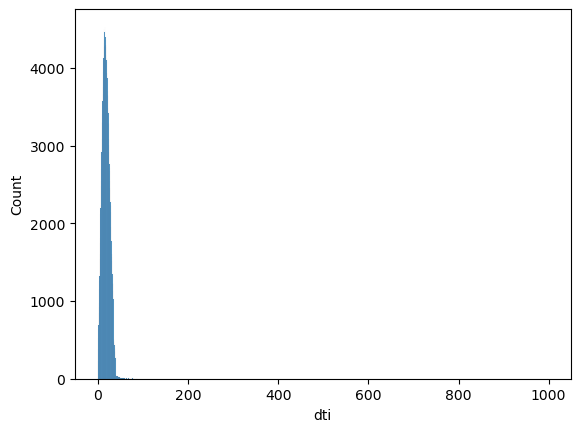

In [47]:
sns.histplot(undersampled_df2['dti'])

<Axes: >

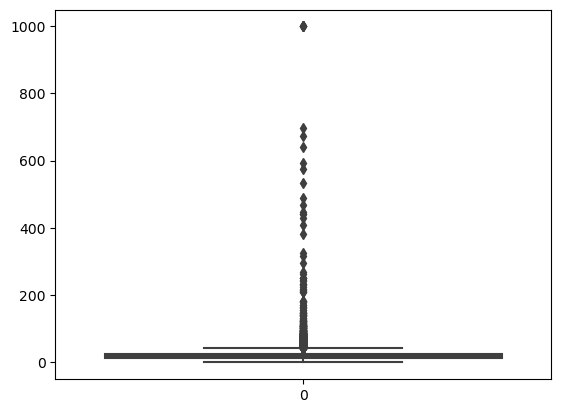

In [48]:
sns.boxplot(undersampled_df2['dti'])

In [49]:
undersampled_df2['mths_since_last_delinq'].describe()

count    129283.000000
mean         34.213887
std          21.887828
min           0.000000
25%          16.000000
50%          31.000000
75%          50.000000
max         226.000000
Name: mths_since_last_delinq, dtype: float64

<Axes: >

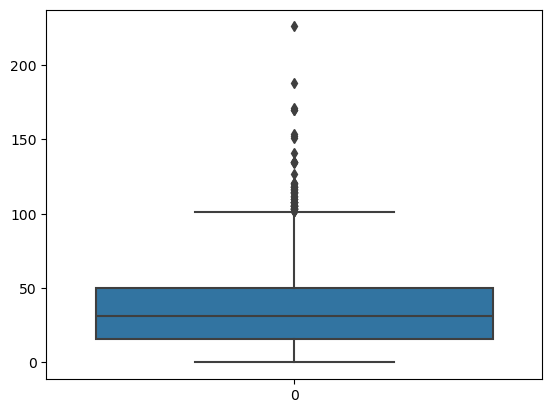

In [50]:
sns.boxplot(undersampled_df2['mths_since_last_delinq'])

In [51]:
undersampled_df2['tot_hi_cred_lim'].describe()

count    2.472860e+05
mean     1.745143e+05
std      1.768140e+05
min      0.000000e+00
25%      4.982325e+04
50%      1.130880e+05
75%      2.524095e+05
max      9.999999e+06
Name: tot_hi_cred_lim, dtype: float64

In [52]:
undersampled_df2['pub_rec_bankruptcies'].median()

0.0

<Axes: >

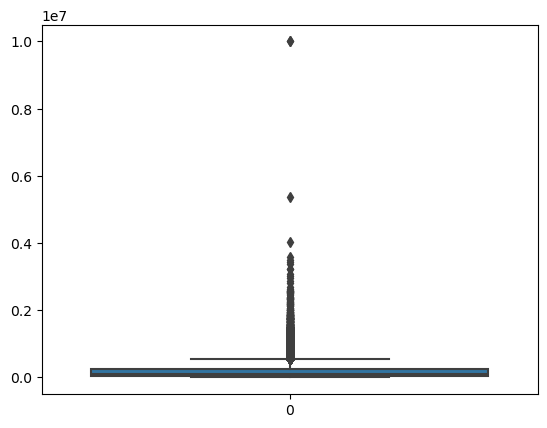

In [53]:
sns.boxplot(undersampled_df2['tot_hi_cred_lim'])

In [54]:
undersampled_df2['tot_hi_cred_lim'].median()

113088.0

<Axes: xlabel='tot_hi_cred_lim', ylabel='Count'>

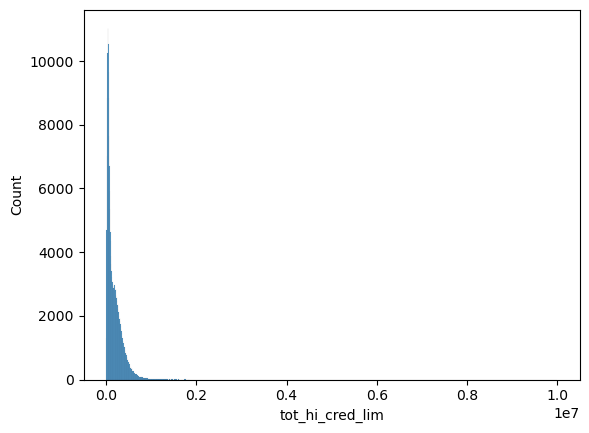

In [55]:
sns.histplot(undersampled_df2['tot_hi_cred_lim'])

<Axes: xlabel='tot_hi_cred_lim', ylabel='Density'>

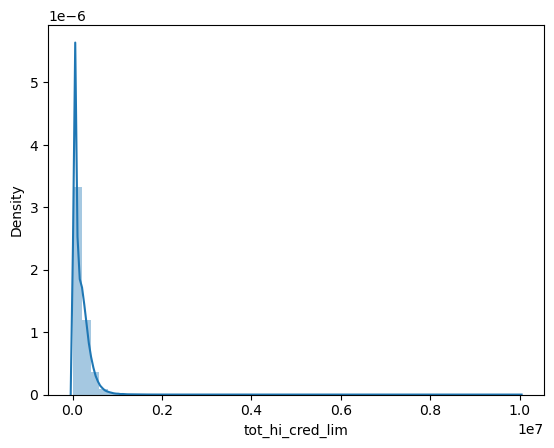

In [56]:
sns.distplot(undersampled_df2['tot_hi_cred_lim'])

In [57]:
undersampled_df2['mths_since_rcnt_il'].describe()

count    97448.000000
mean        19.316713
std         24.622841
min          0.000000
25%          6.000000
50%         12.000000
75%         21.000000
max        488.000000
Name: mths_since_rcnt_il, dtype: float64

In [58]:
undersampled_df2['mths_since_rcnt_il'].mean()

19.316712503078566

<Axes: xlabel='mths_since_rcnt_il', ylabel='Count'>

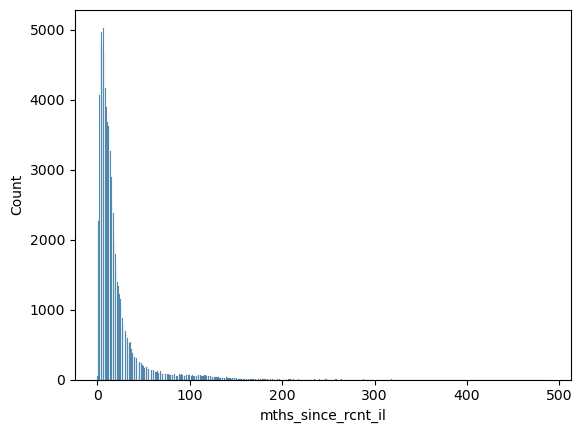

In [59]:
sns.histplot(undersampled_df2['mths_since_rcnt_il'])

<Axes: >

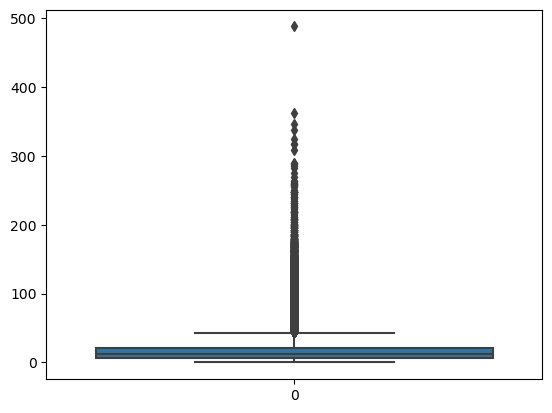

In [60]:
sns.boxplot(undersampled_df2['mths_since_rcnt_il'])

In [61]:
undersampled_df2.drop(columns=['emp_title','title'],axis=1,inplace=True)

In [62]:
undersampled_df2.shape

(261276, 94)

In [63]:
undersampled_df2['open_acc'].describe()

count    261270.000000
mean         11.603184
std           5.496070
min           0.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          80.000000
Name: open_acc, dtype: float64

<Axes: >

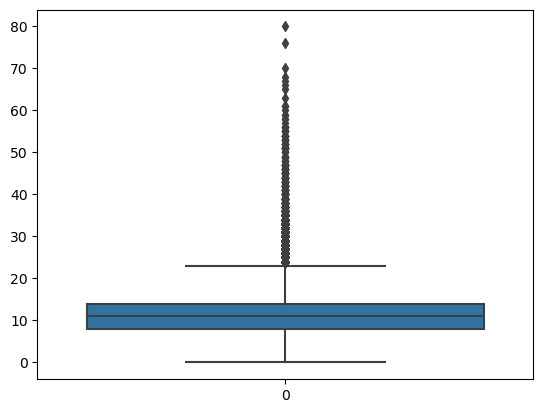

In [64]:
sns.boxplot(undersampled_df2['open_acc'])

In [65]:
undersampled_df2.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status,region,months_to_issue
0,11925,36,11.53,393.41,B,B5,7 years,MORTGAGE,55000.0,Source Verified,2015-04-01,n,debt_consolidation,22.89,0.0,2006-02-01,0.0,NaN,6.0,0.0,1499,14.0,12.0,f,0.0,0.0,2222.44,0.0,0.0,0.0,393.37,0.0,1,Individual,0.0,0.0,46859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10700.0,NaN,NaN,NaN,2.0,9372.0,9201.0,14.0,0.0,0.0,110.0,109.0,18.0,3.0,0.0,18.0,18.0,NaN,0.0,3.0,3.0,3.0,4.0,4.0,4.0,8.0,3.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,72036.0,46859.0,10700.0,61336.0,N,Cash,N,1.0,Eastern,111
1,3000,36,18.75,109.59,D,D3,NaN,MORTGAGE,65000.0,Verified,2012-12-01,n,other,27.31,0.0,1994-01-01,0.0,NaN,13.0,0.0,39527,87.8,29.0,f,0.0,0.0,945.20,0.0,0.0,0.0,109.55,0.0,1,Individual,0.0,0.0,200243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000.0,NaN,NaN,NaN,3.0,16687.0,333.0,98.6,0.0,0.0,167.0,230.0,2.0,2.0,1.0,55.0,19.0,NaN,0.0,5.0,8.0,5.0,10.0,11.0,10.0,17.0,8.0,13.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,222208.0,53288.0,23500.0,27423.0,N,Cash,N,1.0,Eastern,230
2,28775,60,15.61,693.81,D,D1,6 years,RENT,60000.0,Source Verified,2014-05-01,n,debt_consolidation,25.36,0.0,1999-01-01,1.0,41.0,11.0,0.0,19022,55.1,41.0,w,0.0,0.0,785.22,0.0,0.0,0.0,3172.60,0.0,1,Individual,0.0,0.0,59859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34500.0,NaN,NaN,NaN,7.0,5442.0,11437.0,61.2,0.0,0.0,184.0,134.0,2.0,2.0,2.0,5.0,0.0,NaN,0.0,4.0,6.0,4.0,18.0,14.0,7.0,25.0,6.0,11.0,0.0,0.0,0.0,4.0,97.6,25.0,0.0,0.0,87357.0,59859.0,29500.0,52857.0,N,Cash,N,1.0,Pacific,186
3,10000,36,13.58,339.74,C,C2,10+ years,RENT,36000.0,Not Verified,2018-03-01,n,credit_card,29.20,0.0,2011-01-01,1.0,29.0,8.0,1.0,9491,62.4,17.0,w,0.0,0.0,753.27,0.0,0.0,0.0,8708.31,0.0,1,Individual,0.0,0.0,38344.0,1.0,2.0,0.0,2.0,17.0,28853.0,81.0,1.0,2.0,3142.0,75.0,15200.0,1.0,3.0,1.0,4.0,5478.0,158.0,95.2,0.0,0.0,72.0,86.0,4.0,4.0,0.0,86.0,4.0,29.0,0.0,1.0,4.0,1.0,3.0,5.0,6.0,12.0,4.0,8.0,0.0,0.0,0.0,1.0,94.1,100.0,1.0,0.0,50831.0,38344.0,3300.0,35631.0,N,DirectPay,N,1.0,Eastern,87
4,10075,60,18.99,261.30,E,E3,10+ years,RENT,38000.0,Verified,2015-12-01,n,other,36.92,0.0,1998-03-01,0.0,44.0,11.0,0.0,4533,42.8,19.0,w,0.0,0.0,4339.55,30.0,0.0,0.0,50.00,0.0,1,Individual,0.0,255.0,30100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10600.0,NaN,NaN,NaN,7.0,2736.0,2553.0,50.9,0.0,0.0,212.0,102.0,7.0,7.0,1.0,43.0,11.0,NaN,2.0,2.0,5.0,3.0,3.0,9.0,8.0,9.0,5.0,11.0,0.0,0.0,0.0,5.0,84.2,66.7,0.0,0.0,45555.0,30100.0,5200.0,34955.0,N,Cash,Y,0.0,Eastern,216


In [66]:
undersampled_df2.drop(columns="sub_grade",axis=1,inplace=True)

In [67]:
undersampled_df2.drop(columns="issue_d",axis=1,inplace=True)

In [68]:
undersampled_df2.drop(columns="earliest_cr_line",axis=1,inplace=True)

In [69]:
undersampled_df2.shape

(261276, 91)

In [70]:
undersampled_df2.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status,region,months_to_issue
0,11925,36,11.53,393.41,B,7 years,MORTGAGE,55000.0,Source Verified,n,debt_consolidation,22.89,0.0,0.0,NaN,6.0,0.0,1499,14.0,12.0,f,0.0,0.0,2222.44,0.0,0.0,0.0,393.37,0.0,1,Individual,0.0,0.0,46859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10700.0,NaN,NaN,NaN,2.0,9372.0,9201.0,14.0,0.0,0.0,110.0,109.0,18.0,3.0,0.0,18.0,18.0,NaN,0.0,3.0,3.0,3.0,4.0,4.0,4.0,8.0,3.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,72036.0,46859.0,10700.0,61336.0,N,Cash,N,1.0,Eastern,111
1,3000,36,18.75,109.59,D,NaN,MORTGAGE,65000.0,Verified,n,other,27.31,0.0,0.0,NaN,13.0,0.0,39527,87.8,29.0,f,0.0,0.0,945.20,0.0,0.0,0.0,109.55,0.0,1,Individual,0.0,0.0,200243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000.0,NaN,NaN,NaN,3.0,16687.0,333.0,98.6,0.0,0.0,167.0,230.0,2.0,2.0,1.0,55.0,19.0,NaN,0.0,5.0,8.0,5.0,10.0,11.0,10.0,17.0,8.0,13.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,222208.0,53288.0,23500.0,27423.0,N,Cash,N,1.0,Eastern,230
2,28775,60,15.61,693.81,D,6 years,RENT,60000.0,Source Verified,n,debt_consolidation,25.36,0.0,1.0,41.0,11.0,0.0,19022,55.1,41.0,w,0.0,0.0,785.22,0.0,0.0,0.0,3172.60,0.0,1,Individual,0.0,0.0,59859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34500.0,NaN,NaN,NaN,7.0,5442.0,11437.0,61.2,0.0,0.0,184.0,134.0,2.0,2.0,2.0,5.0,0.0,NaN,0.0,4.0,6.0,4.0,18.0,14.0,7.0,25.0,6.0,11.0,0.0,0.0,0.0,4.0,97.6,25.0,0.0,0.0,87357.0,59859.0,29500.0,52857.0,N,Cash,N,1.0,Pacific,186
3,10000,36,13.58,339.74,C,10+ years,RENT,36000.0,Not Verified,n,credit_card,29.20,0.0,1.0,29.0,8.0,1.0,9491,62.4,17.0,w,0.0,0.0,753.27,0.0,0.0,0.0,8708.31,0.0,1,Individual,0.0,0.0,38344.0,1.0,2.0,0.0,2.0,17.0,28853.0,81.0,1.0,2.0,3142.0,75.0,15200.0,1.0,3.0,1.0,4.0,5478.0,158.0,95.2,0.0,0.0,72.0,86.0,4.0,4.0,0.0,86.0,4.0,29.0,0.0,1.0,4.0,1.0,3.0,5.0,6.0,12.0,4.0,8.0,0.0,0.0,0.0,1.0,94.1,100.0,1.0,0.0,50831.0,38344.0,3300.0,35631.0,N,DirectPay,N,1.0,Eastern,87
4,10075,60,18.99,261.30,E,10+ years,RENT,38000.0,Verified,n,other,36.92,0.0,0.0,44.0,11.0,0.0,4533,42.8,19.0,w,0.0,0.0,4339.55,30.0,0.0,0.0,50.00,0.0,1,Individual,0.0,255.0,30100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10600.0,NaN,NaN,NaN,7.0,2736.0,2553.0,50.9,0.0,0.0,212.0,102.0,7.0,7.0,1.0,43.0,11.0,NaN,2.0,2.0,5.0,3.0,3.0,9.0,8.0,9.0,5.0,11.0,0.0,0.0,0.0,5.0,84.2,66.7,0.0,0.0,45555.0,30100.0,5200.0,34955.0,N,Cash,Y,0.0,Eastern,216


In [71]:
undersampled_df2['current_loan_status'].value_counts()

current_loan_status
1.0    208786
0.0     52490
Name: count, dtype: int64

In [72]:
undersampled_df6 = undersampled_df2.copy()

In [73]:
columns_to_impute = ['annual_inc', 'dti', 'mths_since_last_delinq', 'pub_rec', 'revol_util', 'total_acc', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util','mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_op_past_12m', 'percent_bc_gt_75', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']
undersampled_df6[columns_to_impute] = undersampled_df6[columns_to_impute].apply(lambda x: x.fillna(x.median()))

In [74]:
columns_to_impute_mode = ['emp_length', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies']
undersampled_df6[columns_to_impute_mode] = undersampled_df6[columns_to_impute_mode].apply(lambda x: x.fillna(x.mode()[0]))

In [75]:
columns_to_impute_zero = ['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m']
undersampled_df6[columns_to_impute_zero] = undersampled_df6[columns_to_impute_zero].apply(lambda x: x.fillna(0))

In [76]:
columns_to_impute_mean = ['acc_open_past_24mths' ]
undersampled_df6[columns_to_impute_mean] = undersampled_df6[columns_to_impute_mean].apply(lambda x: x.fillna(x.mean()))

In [77]:
undersampled_df6['acc_open_past_24mths'].isnull().sum()

0

In [78]:
undersampled_df6['delinq_amnt']=undersampled_df6['delinq_amnt'].fillna(undersampled_df6['delinq_amnt'].median())

In [79]:
undersampled_df6['delinq_amnt'].isnull().sum()

0

In [80]:
undersampled_df6['open_acc']=undersampled_df6['open_acc'].fillna(undersampled_df6['open_acc'].median())


In [81]:
undersampled_df6['inq_last_6mths']=undersampled_df6['inq_last_6mths'].fillna(undersampled_df6['inq_last_6mths'].median())

In [82]:
undersampled_df6['inq_last_6mths'].isnull().sum()

0

In [83]:
undersampled_df6['delinq_amnt'].isnull().sum()

0

In [84]:
undersampled_df6.dtypes

loan_amnt                           int64
term                                int64
int_rate                          float64
installment                       float64
grade                              object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
pymnt_plan                         object
purpose                            object
dti                               float64
delinq_2yrs                       float64
inq_last_6mths                    float64
mths_since_last_delinq            float64
open_acc                          float64
pub_rec                           float64
revol_bal                           int64
revol_util                        float64
total_acc                         float64
initial_list_status                object
out_prncp                         float64
out_prncp_inv                     float64
total_rec_int                     

In [85]:
undersampled_df7 = undersampled_df6.copy()

In [86]:
undersampled_df7['il_util'] = np.where(undersampled_df7['il_util'] > 76.0, 76.0, undersampled_df7['il_util'])

In [87]:
undersampled_df7['open_rv_24m'] = np.where(undersampled_df7['open_rv_24m'] > 5.0, 5.0, undersampled_df7['open_rv_24m'])

In [88]:
undersampled_df7['mths_since_rcnt_il'] = np.where(undersampled_df7['mths_since_rcnt_il'] > 21.0, 21.0, undersampled_df7['mths_since_rcnt_il'])

In [89]:
undersampled_df7['open_rv_12m'] = np.where(undersampled_df7['open_rv_12m'] > 3.0, 3.0, undersampled_df7['open_rv_12m'])

In [90]:
undersampled_df7['total_bal_il'] = np.where(undersampled_df7['total_bal_il'] > 48356.0, 48356.0, undersampled_df7['total_bal_il'])

In [91]:
undersampled_df7['max_bal_bc'] = np.where(undersampled_df7['max_bal_bc'] > 7004.0, 7004.0, undersampled_df7['max_bal_bc'])

In [92]:
undersampled_df7['all_util'] = np.where(undersampled_df7['all_util'] > 76.0, 76.0, undersampled_df7['all_util'])

In [93]:
undersampled_df7['total_rev_hi_lim'] = np.where(undersampled_df7['total_rev_hi_lim'] > 56600.0, 56600.0, undersampled_df7['total_rev_hi_lim'])

In [94]:
undersampled_df7['inq_last_12m'] = np.where(undersampled_df7['inq_last_12m'] > 4.0, 4.0, undersampled_df7['inq_last_12m'])

In [95]:
undersampled_df7['acc_open_past_24mths'] = np.where(undersampled_df7['acc_open_past_24mths'] > 9.0, 9.0, undersampled_df7['acc_open_past_24mths'])

In [96]:
undersampled_df7['avg_cur_bal'] = np.where(undersampled_df7['avg_cur_bal'] > 27379.5, 27379.5, undersampled_df7['avg_cur_bal'])

In [97]:
undersampled_df7['bc_open_to_buy'] = np.where(undersampled_df7['bc_open_to_buy'] > 20399.0, 20399.0, undersampled_df7['bc_open_to_buy'])

In [98]:
undersampled_df7['bc_util'] = np.where(undersampled_df7['bc_util'] > 150.0, 150.0, undersampled_df7['bc_util'])

In [99]:
undersampled_df7['mo_sin_old_il_acct'] = np.where(undersampled_df7['mo_sin_old_il_acct'] > 186.0, 186.0, undersampled_df7['mo_sin_old_il_acct'])

In [100]:
undersampled_df7['mo_sin_old_rev_tl_op'] = np.where(undersampled_df7['mo_sin_old_rev_tl_op'] > 300.0, 300.0, undersampled_df7['mo_sin_old_rev_tl_op'])

In [101]:
undersampled_df7['mo_sin_rcnt_rev_tl_op'] = np.where(undersampled_df7['mo_sin_rcnt_rev_tl_op'] > 30.0, 30.0, undersampled_df7['mo_sin_rcnt_rev_tl_op'])

In [102]:
undersampled_df7['last_pymnt_amnt'] = np.where(undersampled_df7['last_pymnt_amnt'] > 4000, 4000, undersampled_df7['last_pymnt_amnt'])
undersampled_df7['last_pymnt_amnt'].max()

4000.0

In [103]:
undersampled_df7['collections_12_mths_ex_med'] = np.where(undersampled_df7['collections_12_mths_ex_med'] > 0, 0, undersampled_df7['collections_12_mths_ex_med'])
undersampled_df7['collections_12_mths_ex_med'].max()

0.0

In [104]:
undersampled_df7['policy_code'] = np.where(undersampled_df7['policy_code'] > 1, 1, undersampled_df7['policy_code'])

In [105]:
undersampled_df7['last_pymnt_amnt'] = np.where(undersampled_df7['last_pymnt_amnt'] > 4000, 4000, undersampled_df7['last_pymnt_amnt'])
undersampled_df7['last_pymnt_amnt'].max()

4000.0

In [106]:
undersampled_df7['collections_12_mths_ex_med'] = np.where(undersampled_df7['collections_12_mths_ex_med'] > 0, 0, undersampled_df7['collections_12_mths_ex_med'])
undersampled_df7['collections_12_mths_ex_med'].max()

0.0

In [107]:
undersampled_df7['policy_code'] = np.where(undersampled_df7['policy_code'] > 1, 1, undersampled_df7['policy_code'])
undersampled_df7['policy_code'].max()

1

In [108]:
undersampled_df7['acc_now_delinq'] = np.where(undersampled_df7['acc_now_delinq'] > 0, 0, undersampled_df7['acc_now_delinq'])
undersampled_df7['acc_now_delinq'].max()

0.0

In [109]:
undersampled_df7['tot_coll_amt'] = np.where(undersampled_df7['tot_coll_amt'] > 250, 250, undersampled_df7['tot_coll_amt'])
undersampled_df7['tot_coll_amt'].max()

250.0

In [110]:
undersampled_df7['tot_cur_bal'] = np.where(undersampled_df7['tot_cur_bal'] > 308584, 308584, undersampled_df7['tot_cur_bal'])
undersampled_df7['tot_cur_bal'].max()

308584.0

In [111]:
undersampled_df7['open_act_il'] = np.where(undersampled_df7['open_act_il'] > 10, 10, undersampled_df7['open_act_il'])
undersampled_df7['open_act_il'].max()

10.0

In [112]:
undersampled_df7['open_il_12m'] = np.where(undersampled_df7['open_il_12m'] > 5, 5, undersampled_df7['open_il_12m'])
undersampled_df7['open_il_12m'].max()

5.0

In [113]:
undersampled_df7['open_il_24m'] = np.where(undersampled_df7['open_il_24m'] > 10, 10, undersampled_df7['open_il_24m'])
undersampled_df7['open_il_24m'].max()

10.0

In [114]:
undersampled_df7['pct_tl_nvr_dlq'] = np.where(undersampled_df7['pct_tl_nvr_dlq'] > 100, 100, undersampled_df7['pct_tl_nvr_dlq'])
undersampled_df7['pct_tl_nvr_dlq'].max()

100.0

In [115]:
undersampled_df7['percent_bc_gt_75'] = np.where(undersampled_df7['percent_bc_gt_75'] > 100, 100, undersampled_df7['percent_bc_gt_75'])
undersampled_df7['percent_bc_gt_75'].max()

100.0

In [116]:
undersampled_df7['pub_rec_bankruptcies'] = np.where(undersampled_df7['pub_rec_bankruptcies'] > 1, 1, undersampled_df7['pub_rec_bankruptcies'])
undersampled_df7['pub_rec_bankruptcies'].max()

1.0

In [117]:
undersampled_df7['tax_liens'] = np.where(undersampled_df7['tax_liens'] > 30, 30, undersampled_df7['tax_liens'])
undersampled_df7['tax_liens'].max()

30.0

In [118]:
undersampled_df7['tot_hi_cred_lim'] = np.where(undersampled_df7['tot_hi_cred_lim'] > 356372, 356372, undersampled_df7['tot_hi_cred_lim'])
undersampled_df7['tot_hi_cred_lim'].max()

356372.0

In [119]:
undersampled_df7['total_bal_ex_mort'] = np.where(undersampled_df7['total_bal_ex_mort'] > 98216, 98216, undersampled_df7['total_bal_ex_mort'])
undersampled_df7['total_bal_ex_mort'].max()

98216.0

In [120]:
undersampled_df7['total_bc_limit'] = np.where(undersampled_df7['total_bc_limit'] > 41600, 41600, undersampled_df7['total_bc_limit'])
undersampled_df7['total_bc_limit'].max()

41600.0

In [121]:
undersampled_df7['total_il_high_credit_limit'] = np.where(undersampled_df7['total_il_high_credit_limit'] > 89919, 89919, undersampled_df7['total_il_high_credit_limit'])
undersampled_df7['total_il_high_credit_limit'].max()

89919.0

In [122]:
undersampled_df7['months_to_issue'] = np.where(undersampled_df7['months_to_issue'] > 316, 316, undersampled_df7['months_to_issue'])
undersampled_df7['months_to_issue'].max()

316

In [123]:
undersampled_df7['open_acc_6m'] = np.where(undersampled_df7['open_acc_6m'] > 3.0, 3.0, undersampled_df7['open_acc_6m'])
undersampled_df7['open_acc_6m'].max()

3.0

In [124]:
undersampled_df7['loan_amnt'] = np.where(undersampled_df7['loan_amnt'] > 37400, 37400, undersampled_df7['loan_amnt'])

In [125]:
undersampled_df7['int_rate'] = np.where(undersampled_df7['int_rate'] > 22, 22, undersampled_df7['int_rate'])

In [126]:
undersampled_df7['installment'] = np.where(undersampled_df7['installment'] > undersampled_df7.installment.quantile(q=0.99), undersampled_df7.installment.quantile(q=0.99), undersampled_df7['installment'])

In [127]:
undersampled_df7['annual_inc'] = np.where(undersampled_df7['annual_inc'] > undersampled_df7.annual_inc.quantile(0.9), undersampled_df7.annual_inc.quantile(0.9), undersampled_df7['annual_inc'])

In [128]:
undersampled_df7['annual_inc'] = np.where(undersampled_df7['annual_inc'] > undersampled_df7.annual_inc.quantile(0.9), undersampled_df7.annual_inc.quantile(0.9), undersampled_df7['annual_inc'])

In [129]:
undersampled_df7['delinq_2yrs'] = np.where(undersampled_df7['delinq_2yrs'] > undersampled_df7.delinq_2yrs.quantile(0.99), undersampled_df7.delinq_2yrs.quantile(0.99), undersampled_df7['delinq_2yrs'])

In [130]:
undersampled_df7['inq_last_6mths'] = np.where(undersampled_df7['inq_last_6mths'] > undersampled_df7.inq_last_6mths.quantile(0.99), undersampled_df7.inq_last_6mths.quantile(0.99), undersampled_df7['inq_last_6mths'])

In [131]:
q1=undersampled_df7.mths_since_last_delinq.quantile(q=0.25)
q3=undersampled_df7.mths_since_last_delinq.quantile(q=0.75)
iqr=q3-q1
w=q3+(1.5*iqr)
undersampled_df7['mths_since_last_delinq'] = np.where(undersampled_df7['mths_since_last_delinq'] > w, w, undersampled_df7['mths_since_last_delinq'])

In [132]:
q1=undersampled_df7.mort_acc.quantile(q=0.25)
q3=undersampled_df7.mort_acc.quantile(q=0.75)
iqr=q3-q1
w=q3+(1.5*iqr)
undersampled_df7['mort_acc'] = np.where(undersampled_df7['mort_acc'] > w, w, undersampled_df7['mort_acc'])

In [133]:
undersampled_df7['mths_since_recent_bc'] = np.where(undersampled_df7['mths_since_recent_bc'] > undersampled_df7.mths_since_recent_bc.quantile(0.9), undersampled_df7.mths_since_recent_bc.quantile(0.9), undersampled_df7['mths_since_recent_bc'])

In [134]:
q1=undersampled_df7.mths_since_recent_inq.quantile(q=0.25)
q3=undersampled_df7.mths_since_recent_inq.quantile(q=0.75)
iqr=q3-q1
w=q3+(1.5*iqr)
undersampled_df7['mths_since_recent_inq'] = np.where(undersampled_df7['mths_since_recent_inq'] > w, w, undersampled_df7['mths_since_recent_inq'])

In [135]:
q1=undersampled_df7.mths_since_recent_revol_delinq.quantile(q=0.25)
q3=undersampled_df7.mths_since_recent_revol_delinq.quantile(q=0.75)
iqr=q3-q1
w=q3+(1.5*iqr)
undersampled_df7['mths_since_recent_revol_delinq'] = np.where(undersampled_df7['mths_since_recent_revol_delinq'] > w, w, undersampled_df7['mths_since_recent_revol_delinq'])

In [136]:
undersampled_df7['num_accts_ever_120_pd'] = np.where(undersampled_df7['num_accts_ever_120_pd'] > 2, 2, undersampled_df7['num_accts_ever_120_pd'])
#undersampled_df7.num_accts_ever_120_pd.quantile(0.9)

In [137]:
q1=undersampled_df7.num_actv_bc_tl.quantile(q=0.25)
q3=undersampled_df7.num_actv_bc_tl.quantile(q=0.75)
iqr=q3-q1
w=q3+(1.5*iqr)
undersampled_df7['num_actv_bc_tl'] = np.where(undersampled_df7['num_actv_bc_tl'] > w, w, undersampled_df7['num_actv_bc_tl'])

In [138]:
q1=undersampled_df7.num_actv_rev_tl.quantile(q=0.25)
q3=undersampled_df7.num_actv_rev_tl.quantile(q=0.75)
iqr=q3-q1
w=q3+(1.5*iqr)
undersampled_df7['num_actv_rev_tl'] = np.where(undersampled_df7['num_actv_rev_tl'] > w, w, undersampled_df7['num_actv_rev_tl'])

In [139]:
q1=undersampled_df7.num_bc_sats.quantile(q=0.25)
q3=undersampled_df7.num_bc_sats.quantile(q=0.75)
iqr=q3-q1
w=q3+(1.5*iqr)
undersampled_df7['num_bc_sats'] = np.where(undersampled_df7['num_bc_sats'] > w, w, undersampled_df7['num_bc_sats'])

In [140]:
q1=undersampled_df7.num_bc_tl.quantile(q=0.25)
q3=undersampled_df7.num_bc_tl.quantile(q=0.75)
iqr=q3-q1
w=q3+(1.5*iqr)
undersampled_df7['num_bc_tl'] = np.where(undersampled_df7['num_bc_tl'] > w, w, undersampled_df7['num_bc_tl'])

In [141]:
undersampled_df7['revol_bal'] = np.where(undersampled_df7['revol_bal'] > 41144.0, 41144.0, undersampled_df7['revol_bal'])

In [142]:
undersampled_df7['revol_util'] = np.where(undersampled_df7['revol_util'] > 92.3, 92.3, undersampled_df7['revol_util'])

In [143]:
undersampled_df7['total_acc'] = np.where(undersampled_df7['total_acc'] > 61.0, 61.0, undersampled_df7['total_acc'])

In [144]:
undersampled_df7['total_rec_int'] = np.where(undersampled_df7['total_rec_int'] > 8019.79, 8019.79, undersampled_df7['total_rec_int'])

In [145]:
undersampled_df7['recoveries'] = np.where(undersampled_df7['recoveries'] > 2740.8050000000003, 2740.8050000000003, undersampled_df7['recoveries'])

In [146]:
undersampled_df7['collection_recovery_fee'] = np.where(undersampled_df7['collection_recovery_fee'] > 676.102950000625, 676.102950000625, undersampled_df7['collection_recovery_fee'])

In [147]:
undersampled_df7['num_bc_tl'] = np.where(undersampled_df7['num_bc_tl'] > 21.0, 21.0, undersampled_df7['num_bc_tl'])

In [148]:
undersampled_df7['num_il_tl'] = np.where(undersampled_df7['num_il_tl'] > 23.0, 23.0, undersampled_df7['num_il_tl'])

In [149]:
undersampled_df7['num_op_rev_tl'] = np.where(undersampled_df7['num_op_rev_tl'] > 21.0, 21.0, undersampled_df7['num_op_rev_tl'])

In [150]:
undersampled_df7['num_rev_tl_bal_gt_0'] = np.where(undersampled_df7['num_rev_tl_bal_gt_0'] > 16.0, 16.0, undersampled_df7['num_rev_tl_bal_gt_0'])

In [151]:
undersampled_df7['num_sats'] = np.where(undersampled_df7['num_sats'] > 26.0, 26.0, undersampled_df7['num_sats'])

In [152]:
undersampled_df7['num_tl_90g_dpd_24m'] = np.where(undersampled_df7['num_tl_90g_dpd_24m'] > 2.0, 2.0, undersampled_df7['num_tl_90g_dpd_24m'])

In [153]:
undersampled_df7['num_tl_90g_dpd_24m'] = np.where(undersampled_df7['num_tl_90g_dpd_24m'] > 2.0, 2.0, undersampled_df7['num_tl_90g_dpd_24m'])

In [154]:
undersampled_df7['num_tl_op_past_12m'] = np.where(undersampled_df7['num_tl_op_past_12m'] > 6.0, 6.0, undersampled_df7['num_tl_op_past_12m'])

In [155]:
# converted "term" into categorical 
undersampled_df7['term']=undersampled_df['term'].astype(object)

In [180]:
undersampled_df7['current_loan_status']=undersampled_df7['current_loan_status'].astype(object)

In [156]:
undersampled_df8 = undersampled_df7.copy()

In [157]:
undersampled_df8.dtypes

loan_amnt                           int64
term                               object
int_rate                          float64
installment                       float64
grade                              object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
pymnt_plan                         object
purpose                            object
dti                               float64
delinq_2yrs                       float64
inq_last_6mths                    float64
mths_since_last_delinq            float64
open_acc                          float64
pub_rec                           float64
revol_bal                         float64
revol_util                        float64
total_acc                         float64
initial_list_status                object
out_prncp                         float64
out_prncp_inv                     float64
total_rec_int                     

In [158]:
undersampled_df8.shape

(261276, 91)

In [160]:
num_df=undersampled_df8.select_dtypes('float64','int64')
category_df=undersampled_df8.select_dtypes('object')

In [161]:
num_df['loan_amnt']=undersampled_df8.loan_amnt

In [162]:
num_df['policy_code']=undersampled_df8.policy_code

In [163]:
num_df['months_to_issue']=undersampled_df8.months_to_issue

In [164]:
category_df['home_ownership'].value_counts()

home_ownership
MORTGAGE    129708
RENT        103675
OWN          27778
ANY             57
OTHER           43
NONE            15
Name: count, dtype: int64

In [165]:
category_df.home_ownership=np.where(((category_df.home_ownership=='ANY') | (category_df.home_ownership=='OTHER') | (category_df.home_ownership=='NONE')),'OTHERS',category_df.home_ownership)

In [166]:
category_df['home_ownership'].value_counts()

home_ownership
MORTGAGE    129708
RENT        103675
OWN          27778
OTHERS         115
Name: count, dtype: int64

In [167]:
category_df['emp_length'].value_counts()

emp_length
10+ years    101039
2 years       23774
< 1 year      21172
3 years       20526
1 year        17175
5 years       16356
4 years       15619
6 years       12147
8 years       11945
7 years       11666
9 years        9857
Name: count, dtype: int64

In [168]:
category_df.emp_length=np.where(((category_df.emp_length== '< 1 year')|(category_df.emp_length=='1 year')|(category_df.emp_length=='2 years')|(category_df.emp_length=='3 years')|(category_df.emp_length=='4 years')),'less than 5 years',category_df.emp_length)

In [169]:
category_df.emp_length=np.where(((category_df.emp_length== '5 years')|(category_df.emp_length=='6 years')|(category_df.emp_length=='7 years')|(category_df.emp_length=='8 years')|(category_df.emp_length=='9 years')),'between 5-9 years',category_df.emp_length)

In [170]:
category_df['emp_length'].value_counts()

emp_length
10+ years            101039
less than 5 years     98266
between 5-9 years     61971
Name: count, dtype: int64

In [171]:
category_df.purpose=np.where(((category_df.purpose=='other')|(category_df.purpose=='home_improvement')|(category_df.purpose=='major_purchase')|(category_df.purpose=='small_business')|(category_df.purpose=='medical')|(category_df.purpose=='car')|(category_df.purpose=='moving')|(category_df.purpose=='vacation')|(category_df.purpose=='house')|(category_df.purpose=='wedding')|(category_df.purpose=='renewable_energy')|(category_df.purpose=='educational')),'others',category_df.purpose)

In [172]:
category_df['purpose'].value_counts()

purpose
debt_consolidation    151471
credit_card            57394
others                 52411
Name: count, dtype: int64

In [173]:
category_df['debt_settlement_flag'].value_counts()

debt_settlement_flag
N    254912
Y      6364
Name: count, dtype: int64

In [174]:
num_df.shape

(261276, 78)

In [175]:
def plot_distplots(df, columns):
    """
    Plots distplots for each column in the columns list.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to plot distplots for.
    """
    for column in columns:
        plt.figure(figsize=(2, 2))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

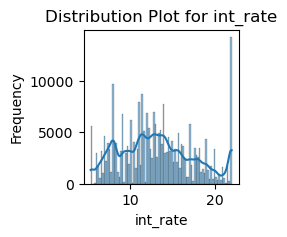

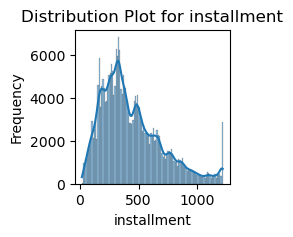

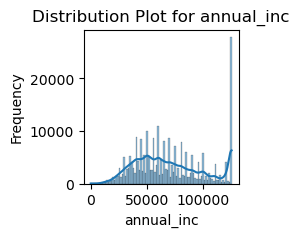

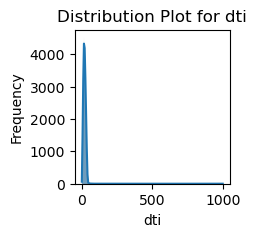

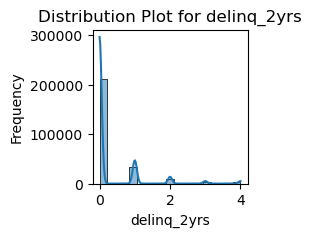

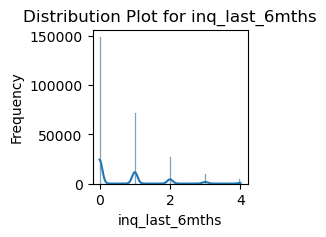

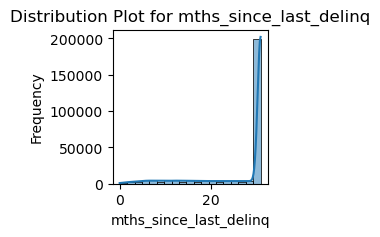

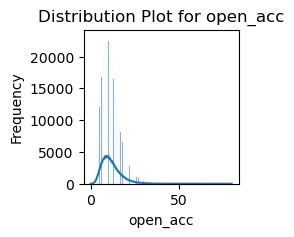

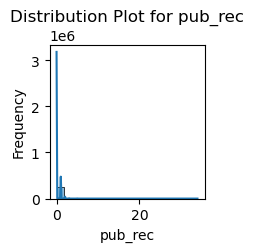

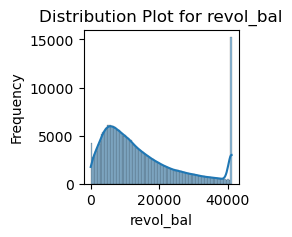

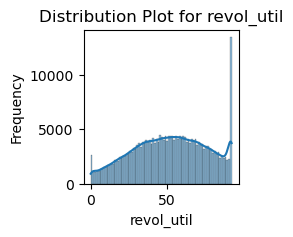

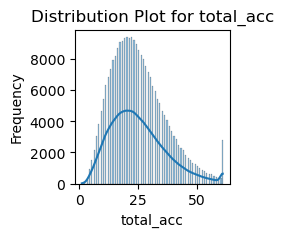

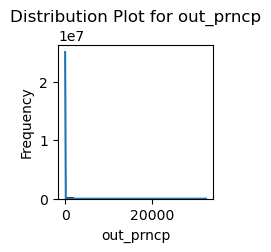

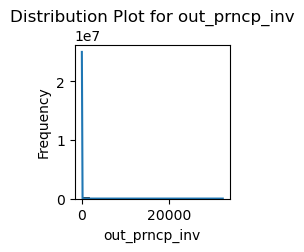

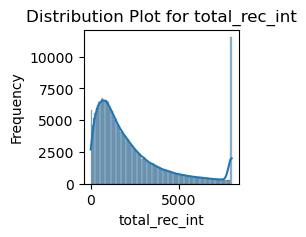

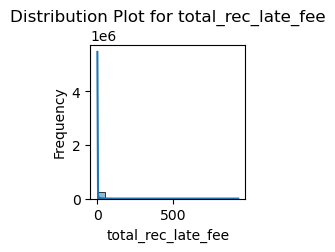

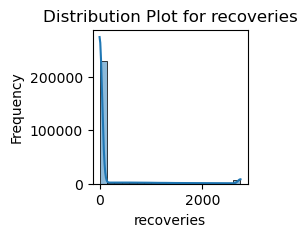

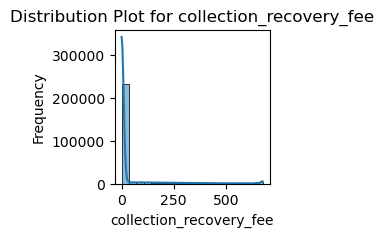

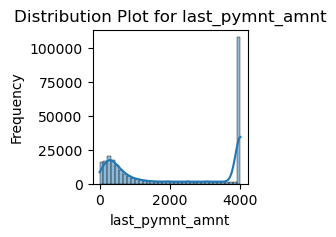

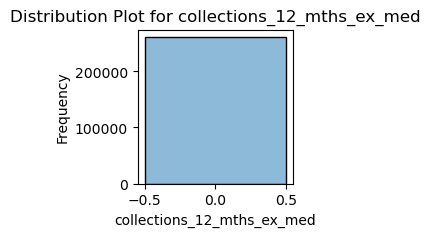

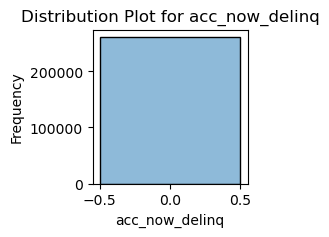

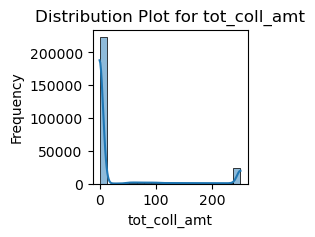

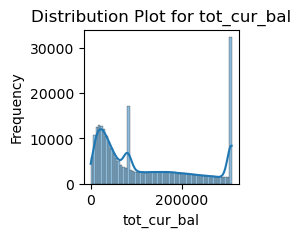

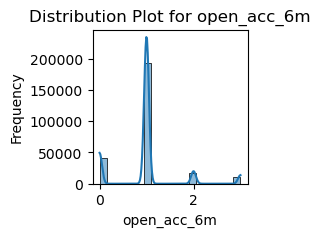

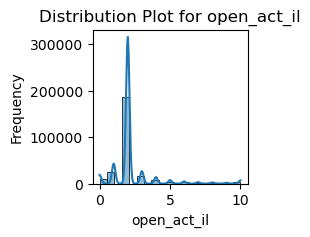

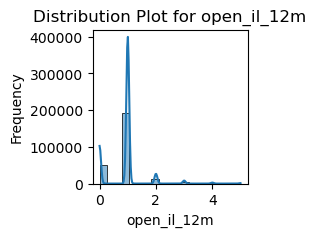

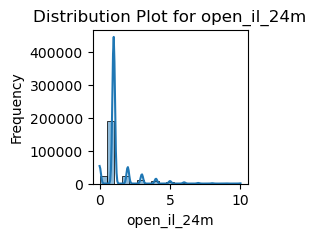

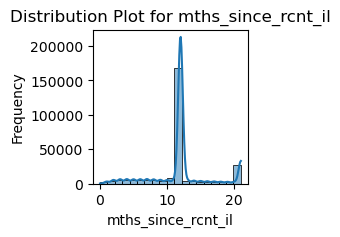

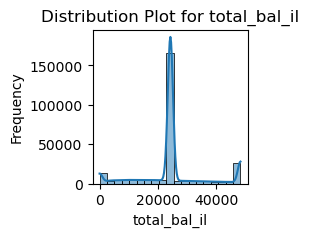

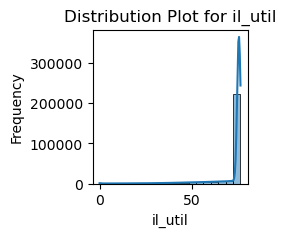

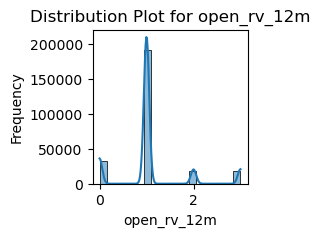

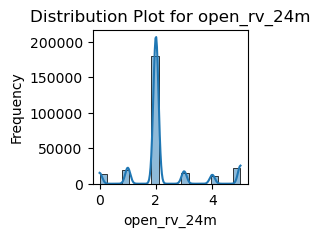

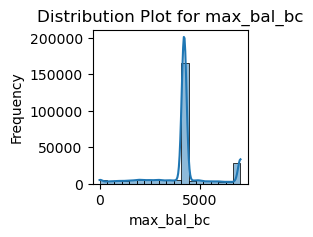

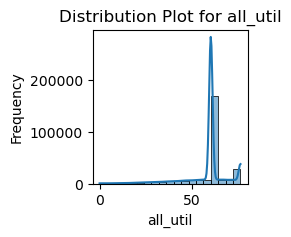

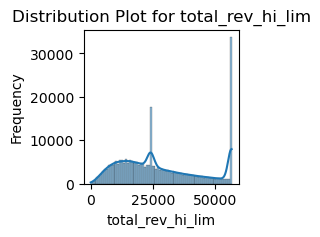

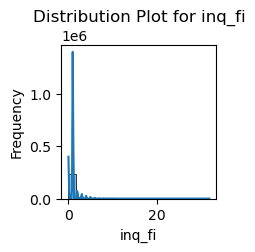

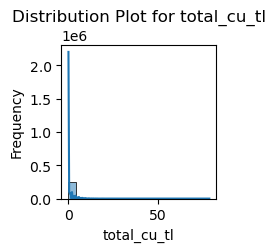

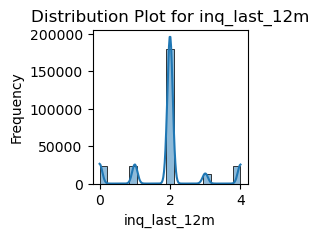

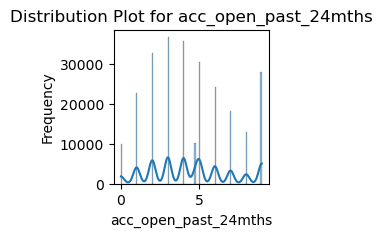

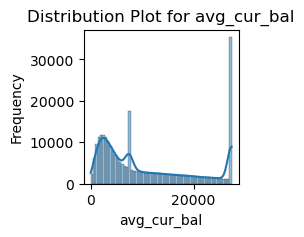

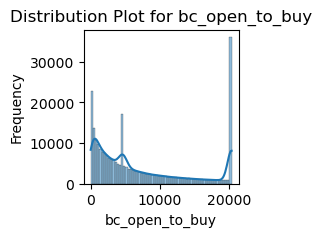

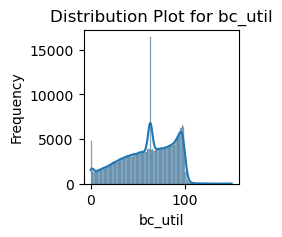

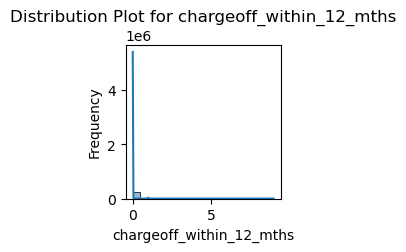

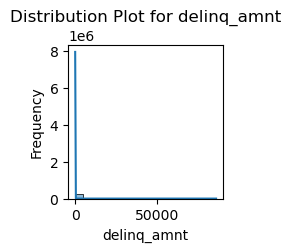

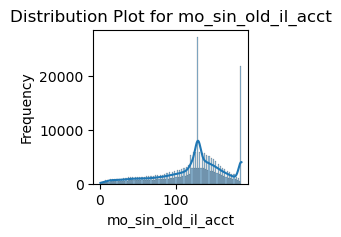

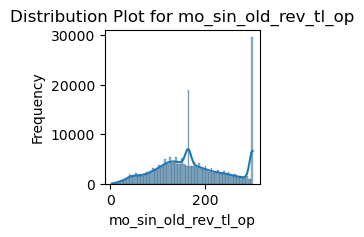

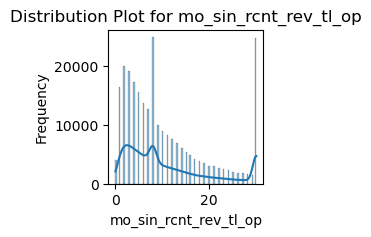

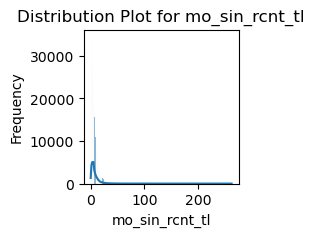

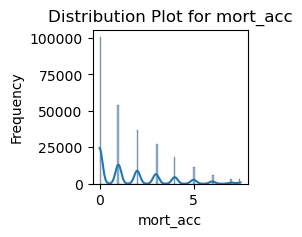

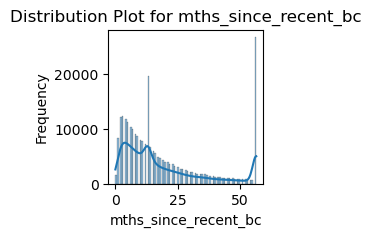

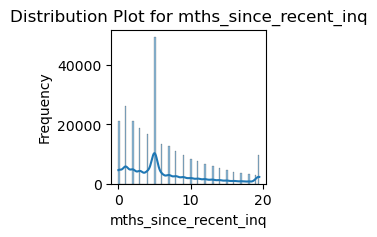

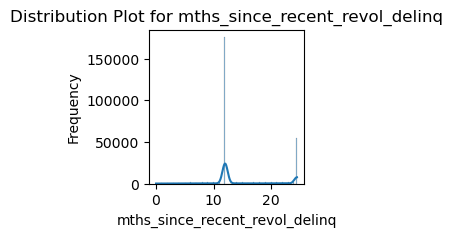

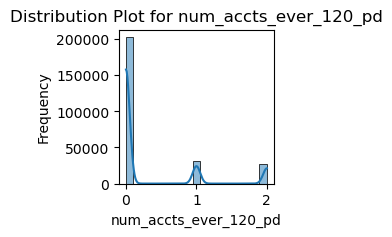

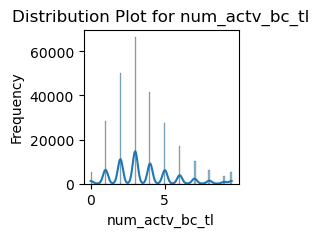

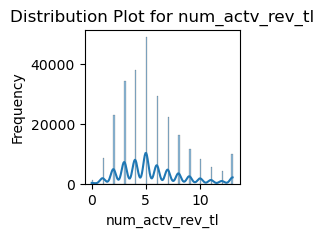

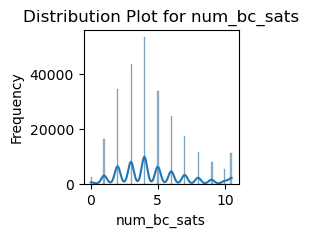

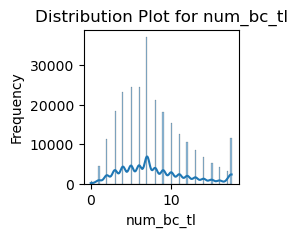

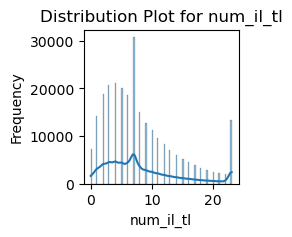

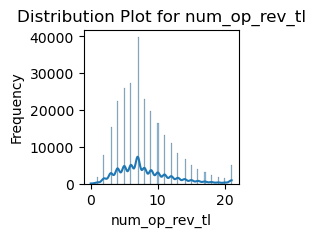

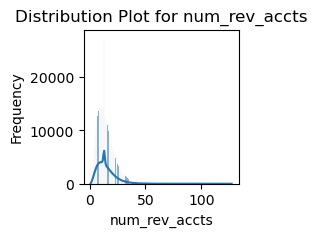

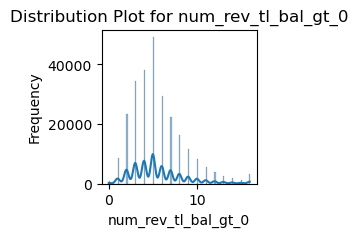

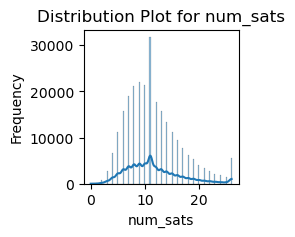

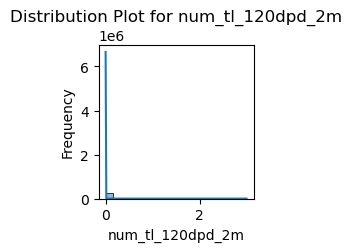

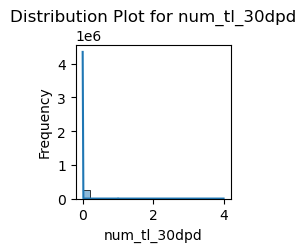

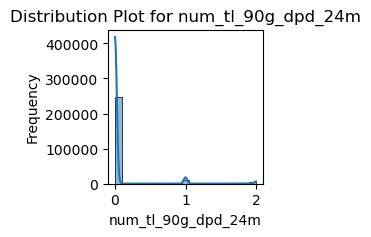

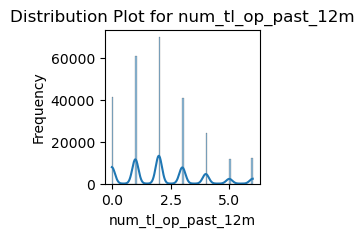

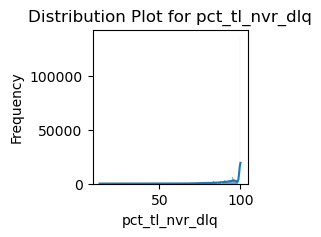

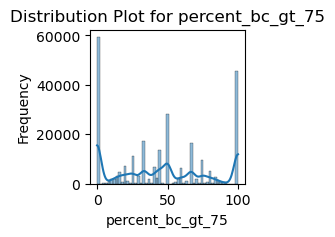

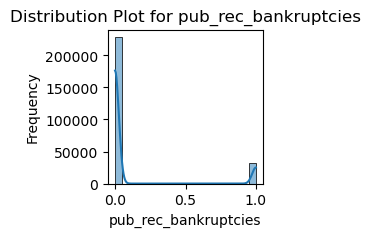

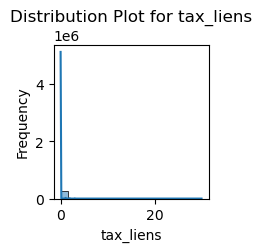

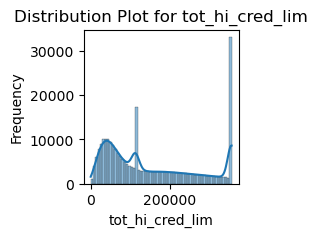

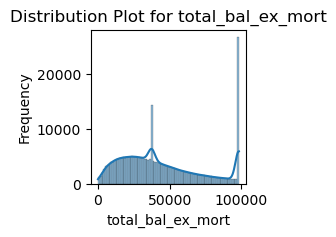

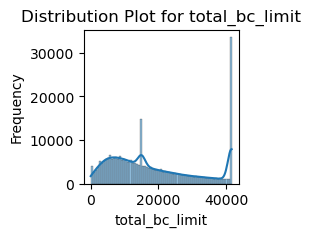

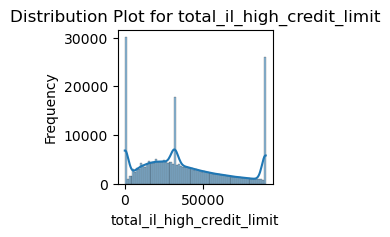

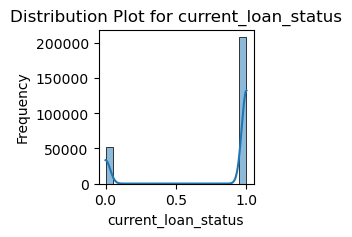

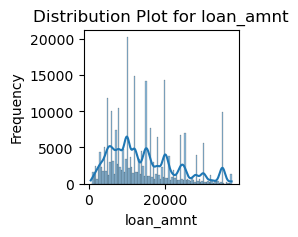

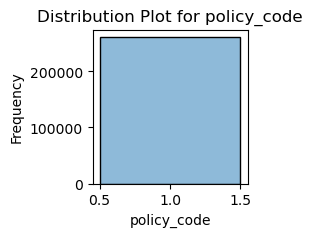

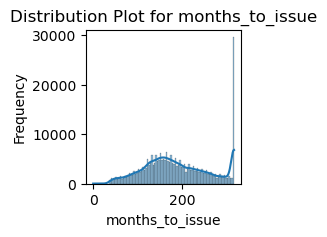

In [176]:
numeric_columns= num_df.columns.to_list()
plot_distplots(num_df,numeric_columns)

In [177]:
def plot_boxplots(df, columns):
    for column in columns:
        plt.figure(figsize=(2, 2))
        sns.boxplot(df[column])
        plt.title(f'Distribution Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

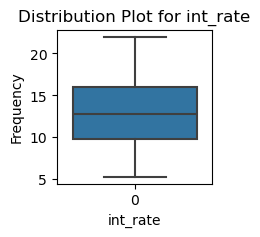

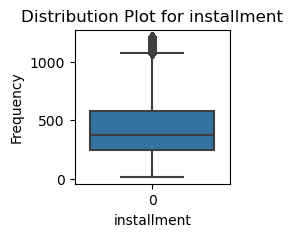

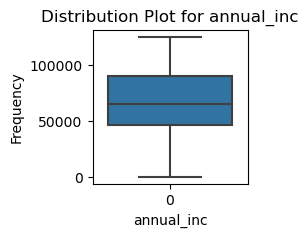

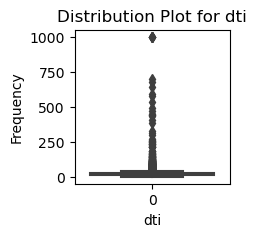

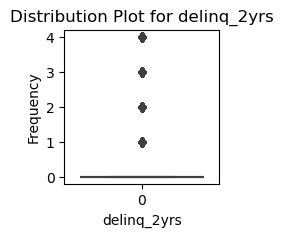

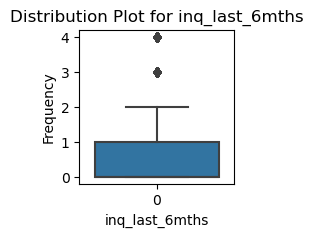

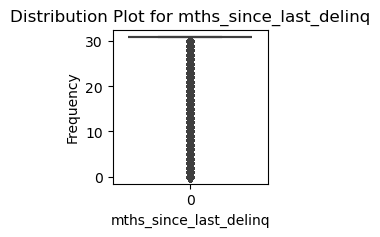

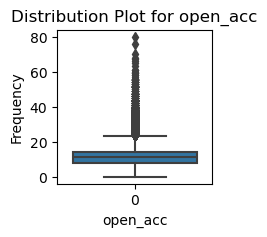

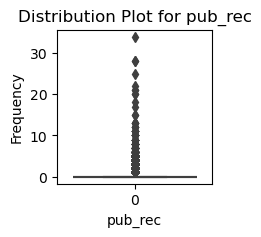

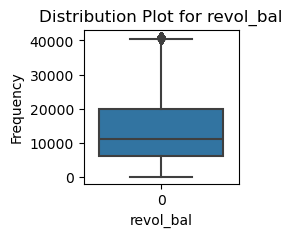

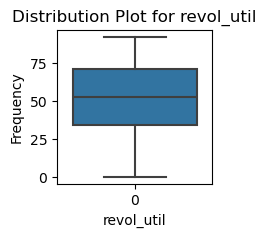

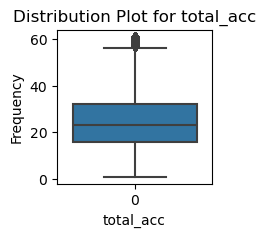

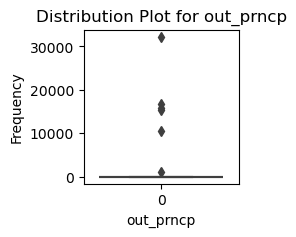

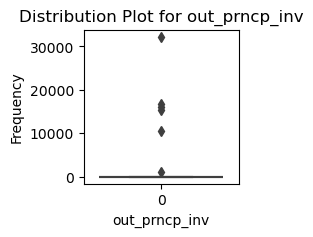

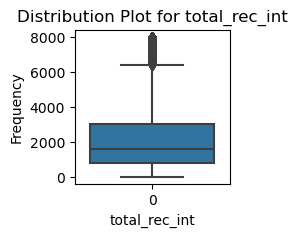

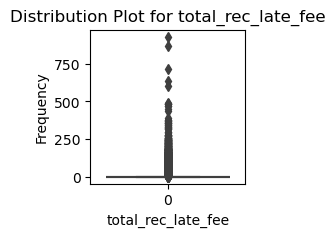

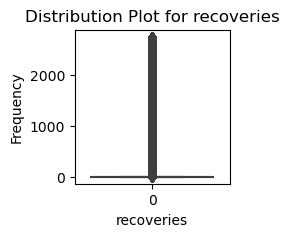

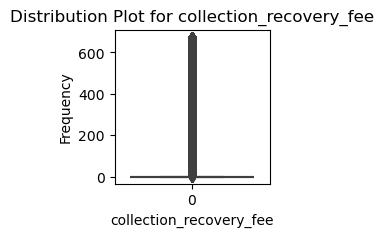

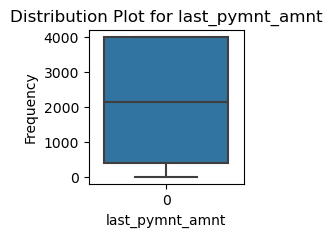

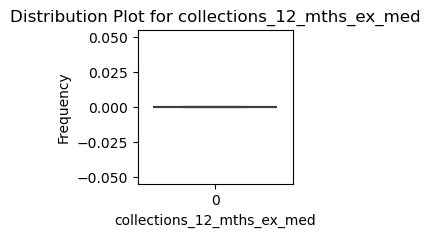

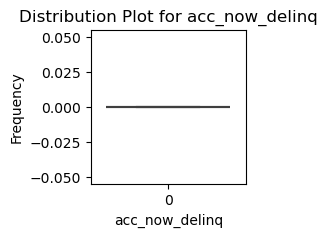

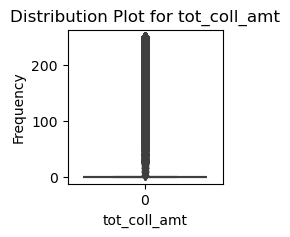

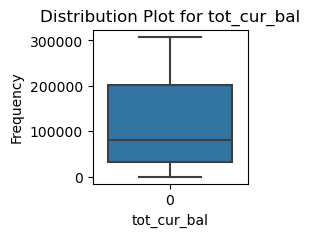

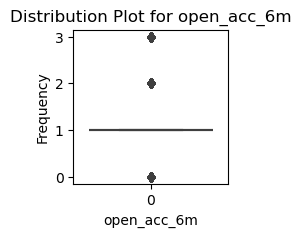

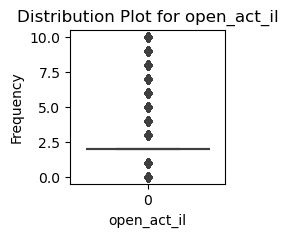

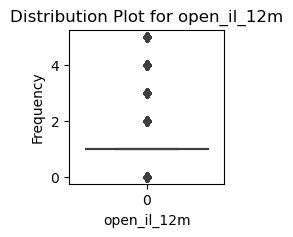

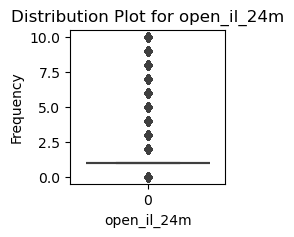

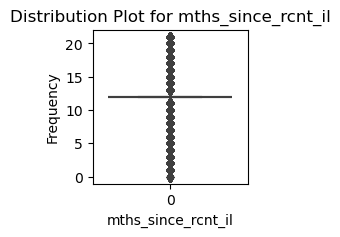

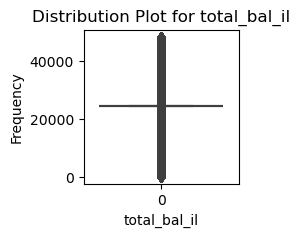

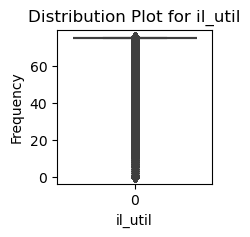

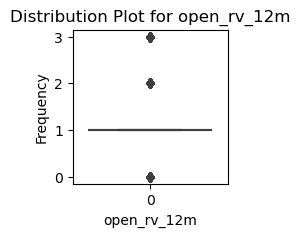

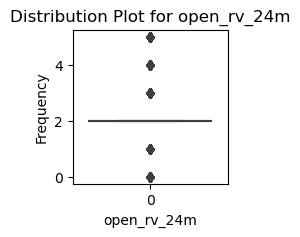

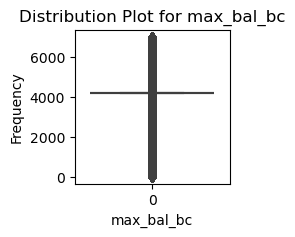

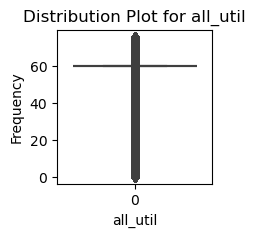

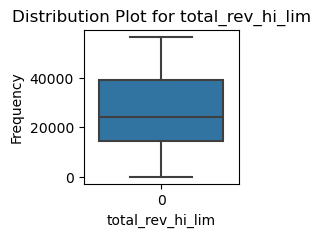

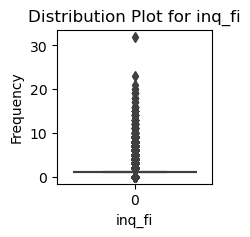

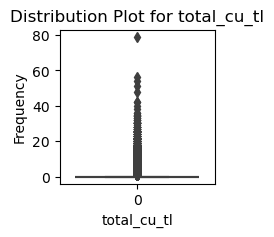

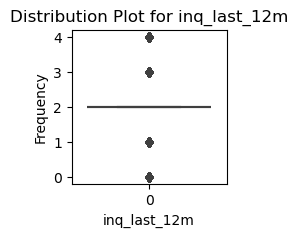

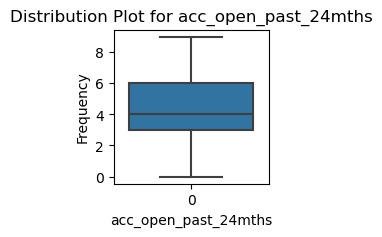

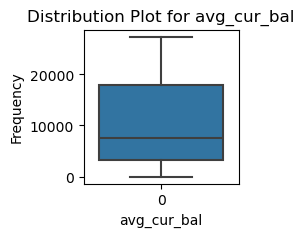

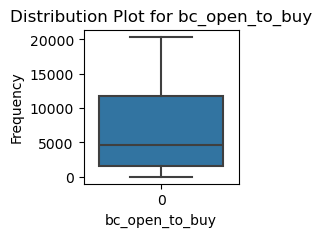

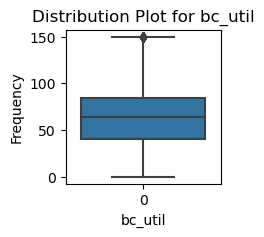

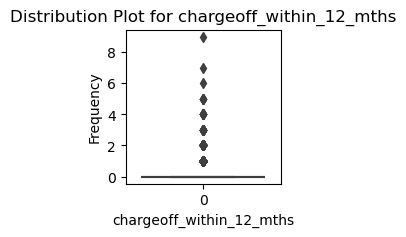

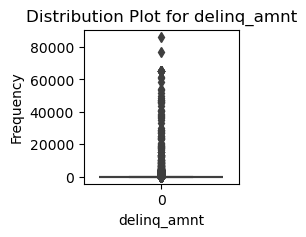

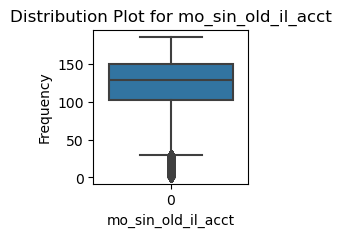

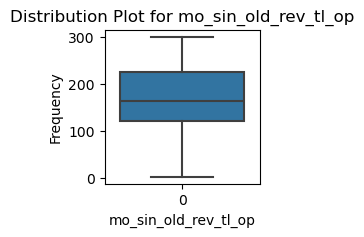

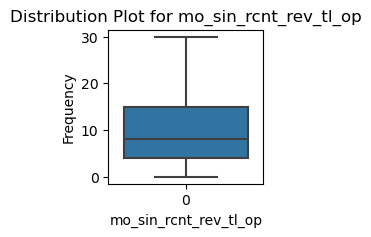

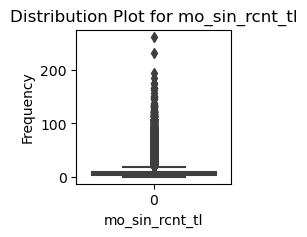

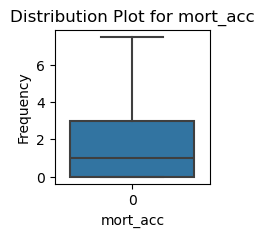

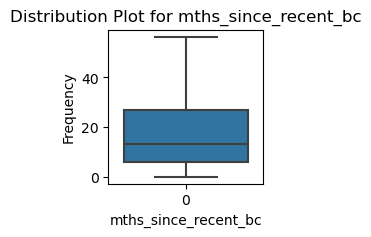

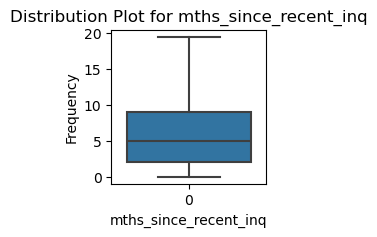

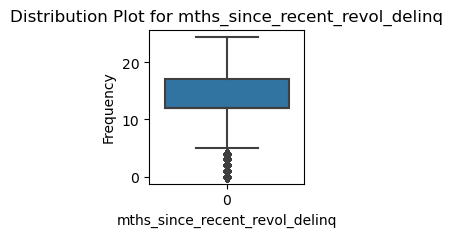

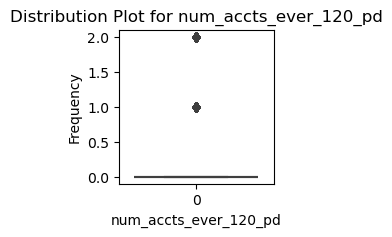

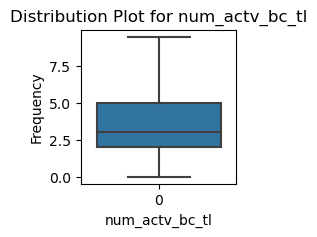

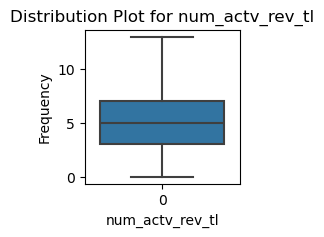

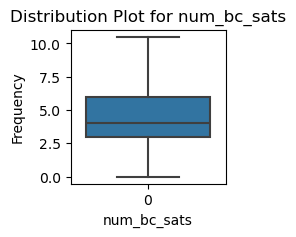

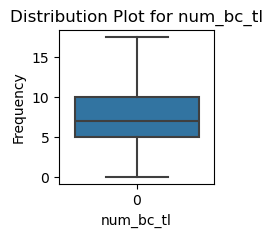

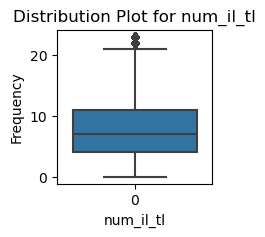

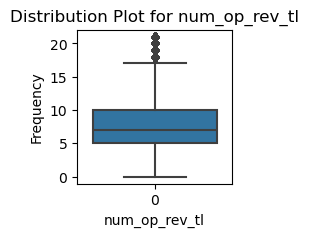

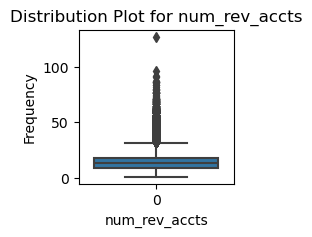

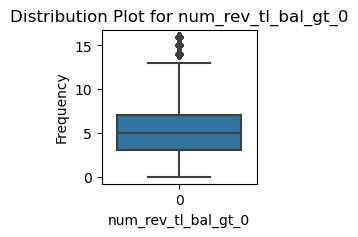

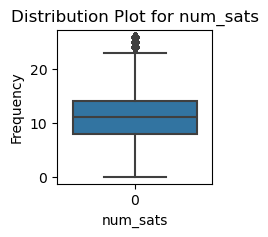

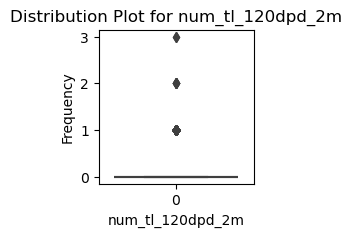

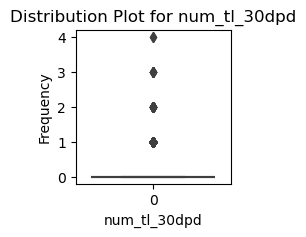

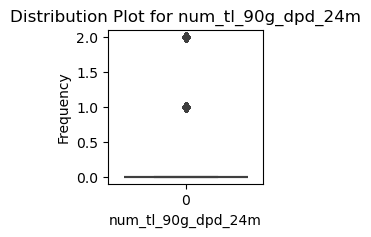

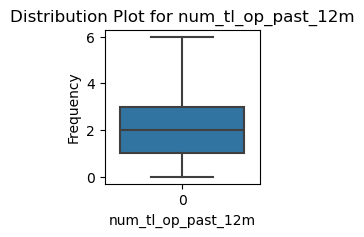

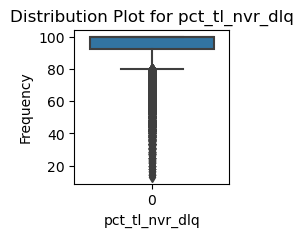

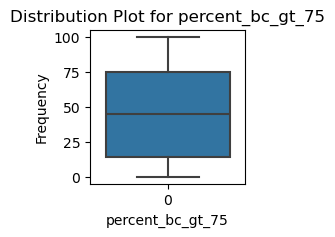

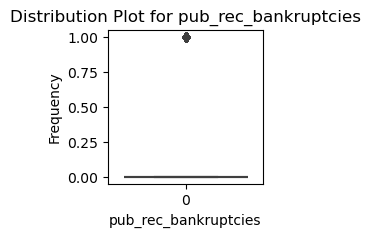

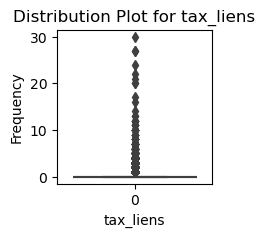

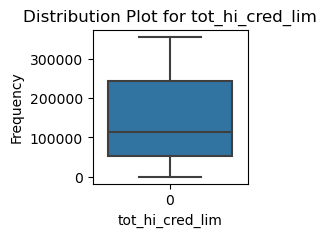

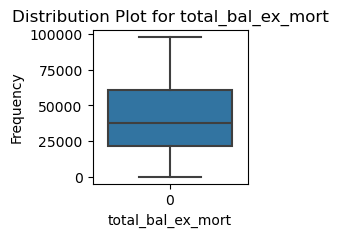

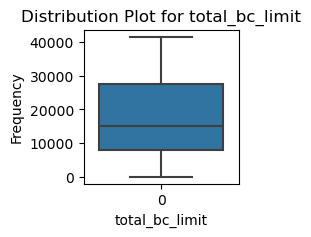

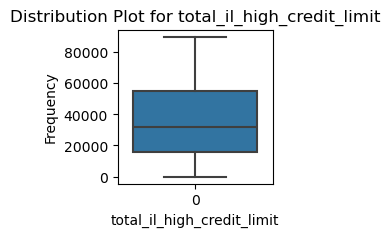

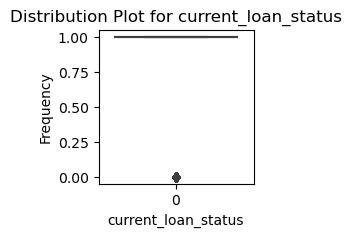

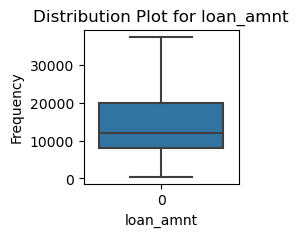

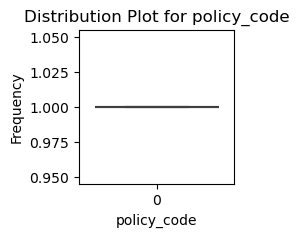

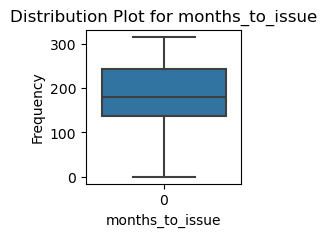

In [178]:
numeric_columns= num_df.columns.to_list()
plot_boxplots(num_df,numeric_columns)

In [181]:
category_df.head()

,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag,region
0,36 months,B,between 5-9 years,MORTGAGE,Source Verified,n,debt_consolidation,f,Individual,N,Cash,N,Eastern
1,36 months,D,10+ years,MORTGAGE,Verified,n,others,f,Individual,N,Cash,N,Eastern
2,60 months,D,between 5-9 years,RENT,Source Verified,n,debt_consolidation,w,Individual,N,Cash,N,Pacific
3,36 months,C,10+ years,RENT,Not Verified,n,credit_card,w,Individual,N,DirectPay,N,Eastern
4,60 months,E,10+ years,RENT,Verified,n,others,w,Individual,N,Cash,Y,Eastern


In [182]:
category_df['current_loan_status'] = undersampled_df7.current_loan_status

In [183]:
num_df.drop(columns = 'current_loan_status', axis=1, inplace=True)

In [184]:
num_df['current_loan_status'] = undersampled_df7.current_loan_status

In [129]:
category_df.nunique()

NameError: name 'category_df' is not defined

In [128]:
class_col=category_df.columns.to_list()

NameError: name 'category_df' is not defined

In [ ]:
class_col

In [ ]:
class_col.pop()

In [ ]:
category_df_dummies = pd.get_dummies(data=category_df,columns=class_col)

In [ ]:
category_df_dummies = pd.get_dummies(data=category_df,columns=class_col)

In [ ]:
category_df_dummies.head()

In [30]:
df_new_dataset=pd.read_csv('final_5june.csv')

In [127]:
df_new_dataset.head()

,term_ 60 months,grade_B,grade_F,grade_G,emp_length_between 5-9 years,emp_length_less than 5 years,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_debt_consolidation,purpose_others,initial_list_status_w,application_type_Joint App,hardship_flag_Y,disbursement_method_DirectPay,debt_settlement_flag_Y,region_Hawaii-Aleutian,region_Mountain,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,loan_amnt,current_loan_status
0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,-0.986509,-0.039362,0.892104,-0.764979,-0.745474,-0.682434,-0.365964,-1.186021,0.091159,0.616506,-0.007196,-1.036836,-0.246594,-0.757197,-0.683193,-0.402557,-0.012658,-1.525434,1.093505,0.105268,0.540924,0.137798,2.047183,-0.212204,-1.530517,-0.799333,-2.141240,0.746891,-1.506434,3.562041,0.171476,2.064590,-0.331070,-0.968501,-0.085251,-0.018973,1.489376,0.400316,0.851669,0.625149,-0.847759,-0.077517,0.189427,-0.472241,0.978461,-0.804103,-1.390015,2.450664,-0.025269,-0.054988,2.935668,-0.795993,0.277153,-0.398975,-0.141946,1.946388,-1.395629,1.0
1,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1.510002,0.351551,-0.423744,0.253107,0.388265,-0.147136,-0.365964,-0.901022,-0.471494,-0.825149,-0.007196,2.020670,-0.246594,2.074355,-0.285892,-0.402557,-0.149993,-0.040616,-0.181647,0.105268,-0.296918,-0.087826,-0.046629,0.340748,-0.188041,0.084595,-0.024177,0.125057,-1.006902,-0.068834,-0.333912,0.002983,1.221994,-0.686323,-0.085251,-0.018973,-1.635345,-1.539414,0.720456,0.121236,-0.847759,0.524990,-0.966213,-0.472241,-0.521321,-0.804103,-1.390015,0.136476,-0.025269,-0.054988,-0.237952,-0.795993,0.659437,-0.398975,-0.141946,1.790584,0.545943,1.0
2,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,-0.639771,0.648573,-0.423744,-0.764979,-0.367561,0.566594,-0.365964,-0.202660,-0.306505,1.888555,-0.007196,1.933926,2.261176,-0.757197,-0.075377,1.715405,-0.380319,-0.040616,-0.181647,0.105268,-0.296918,-0.087826,-0.046629,0.340748,-0.188041,0.084595,-0.024177,0.125057,-0.039453,-0.068834,-0.333912,0.002983,1.221994,-0.585271,-0.085251,-0.018973,1.352527,-0.616370,0.195605,-0.508655,-0.847759,-0.412243,-0.388393,1.488087,-0.521321,0.143087,-0.908949,2.450664,-0.025269,-0.054988,-0.237952,-0.190302,0.103387,-0.398975,-0.141946,0.968290,0.671759,1.0
3,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.053704,-1.722182,-0.423744,3.307367,0.388265,-1.753029,-0.365964,-1.305674,-2.202602,0.362096,-0.007196,0.160809,-0.246594,-0.747537,-0.335357,-0.402557,-0.441812,-0.040616,-0.181647,0.105268,-0.296918,-0.087826,-0.046629,0.340748,-0.188041,0.084595,-0.024177,0.125057,-0.229149,-0.068834,-0.333912,0.002983,0.123387,-0.391283,-0.085251,-0.018973,0.166501,-0.121405,-0.329246,-0.256699,-0.221818,-0.345298,-0.195786,-0.472241,-0.521321,-0.330508,-0.187350,-0.194123,-0.025269,-0.054988,-0.237952,-0.190302,0.659437,-0.398975,-0.141946,-0.220710,1.117834,1.0
4,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,-0.847814,-0.953899,-0.423744,-0.764979,0.703192,-1.217732,-0.365964,-0.493590,0.755343,-0.909952,-0.007196,-0.823654,-0.246594,-0.757197,0.906318,-0.402557,-1.003996,-0.040616,-0.181647,0.105268,-0.296918,-0.087826,-0.046629,0.340748,-0.188041,0.084595,-0.024177,0.125057,-0.880438,-0.068834,-0.3339

In [29]:
import pandas as pd

In [31]:
df_new_dataset.shape

(261276, 105)

In [32]:
df_new_dataset.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [33]:
df_new_dataset.shape

(261276, 104)

In [35]:
#no correlation 
df_new_dataset.drop(columns=['collections_12_mths_ex_med','acc_now_delinq','policy_code'],axis=1,inplace=True)

In [36]:
#correlation matrix
#highly correlated to each other
df_new_dataset.drop(columns=['installment','out_prncp','collection_recovery_fee','avg_cur_bal','bc_util','num_actv_rev_tl','num_bc_sats','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','percent_bc_gt_75','tot_hi_cred_lim','total_bc_limit','total_il_high_credit_limit','months_to_issue'],axis=1,inplace=True)

In [37]:
df_new_dataset.shape

(261276, 85)

In [38]:
df_new_dataset.head()

,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_between 5-9 years,emp_length_less than 5 years,home_ownership_OTHERS,...,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,loan_amnt,current_loan_status
0,0,0,0,0,0,0,0,1,0,0,...,-0.025269,-0.054988,2.935668,-0.795993,0.277153,-0.398975,-0.141946,1.946388,-1.395629,1.0
1,1,0,0,0,1,0,0,1,0,0,...,-0.025269,-0.054988,-0.237952,-0.795993,0.659437,-0.398975,-0.141946,1.790584,0.545943,1.0
2,0,0,0,0,1,0,0,1,0,0,...,-0.025269,-0.054988,-0.237952,-0.190302,0.103387,-0.398975,-0.141946,0.968290,0.671759,1.0
3,1,0,0,1,0,0,0,0,0,0,...,-0.025269,-0.054988,-0.237952,-0.190302,0.659437,-0.398975,-0.141946,-0.220710,1.117834,1.0
4,0,0,0,0,0,0,0,0,1,0,...,-0.025269,-0.054988,-0.237952,-1.401685,-0.997127,-0.398975,-0.141946,-1.258314,-0.998164,0.0


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

In [41]:
vif_data = calculate_vif(df_new_dataset)
print(vif_data)

                Variable        VIF
0        term_ 60 months   2.686159
1                grade_B   5.147303
2                grade_C  13.067174
3                grade_D  16.608205
4                grade_E  14.490486
..                   ...        ...
80  pub_rec_bankruptcies   2.798957
81             tax_liens   3.453489
82     total_bal_ex_mort   3.778525
83             loan_amnt   3.252516
84   current_loan_status  13.622162

[85 rows x 2 columns]


In [43]:
high_vif_columns = vif_data[vif_data["VIF"] > 10]["Variable"]
df_new_dataset = df_new_dataset.drop(columns=high_vif_columns)

In [44]:
df_new_dataset_2=pd.read_csv('final_5june.csv')

In [46]:
nunique = df_new_dataset.nunique()
constant_columns = nunique[nunique == 1].index
df_new_dataset = df_new_dataset.drop(columns=constant_columns)

In [48]:
df_new_dataset['current_loan_status']=df_new_dataset_2.current_loan_status

In [49]:
X=df_new_dataset.iloc[:,:77]
y=df_new_dataset.current_loan_status

In [50]:
X.shape

(261276, 77)

In [51]:
X.dtypes

term_ 60 months                   int64
grade_B                           int64
grade_F                           int64
grade_G                           int64
emp_length_between 5-9 years      int64
                                 ...   
pct_tl_nvr_dlq                  float64
pub_rec_bankruptcies            float64
tax_liens                       float64
total_bal_ex_mort               float64
loan_amnt                       float64
Length: 77, dtype: object

In [52]:
y=y.astype(int)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")

Training data size: (182893, 77)
Testing data size: (78383, 77)


In [57]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled=pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)

In [61]:
from statsmodels.tools import add_constant
X_train_scaled=sm.add_constant(X_train_scaled)

In [62]:
X_train_scaled.shape

(182893, 78)

In [63]:
try:
    logreg = sm.Logit(y_train, X_train_scaled).fit(maxiter=100, method='newton')
    print(logreg.summary())
except Exception as e:
    print("Error occurred:", e)

Error occurred: The indices for endog and exog are not aligned


In [64]:
y_train_s=pd.Series(y_train)

In [65]:
y_train_s.head()

235042    0
98725     0
75970     0
233861    1
36732     1
Name: current_loan_status, dtype: int64

In [66]:
X_train.head()

,term_ 60 months,grade_B,grade_F,grade_G,emp_length_between 5-9 years,emp_length_less than 5 years,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_debt_consolidation,purpose_others,initial_list_status_w,application_type_Joint App,hardship_flag_Y,disbursement_method_DirectPay,debt_settlement_flag_Y,region_Hawaii-Aleutian,region_Mountain,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,loan_amnt
235042,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,-0.327707,-0.067348,0.892104,-0.764979,-0.493532,1.101892,-0.365964,-0.505083,-0.192282,0.446900,-0.007196,-0.840242,-0.246594,-0.757197,2.649114,-0.402557,0.431799,-0.040616,4.281385,0.105268,0.540924,-1.892819,2.047183,0.340748,-0.188041,-0.799333,-1.249215,1.368724,-0.545308,-0.068834,1.182252,2.064590,-0.331070,-0.213984,-0.085251,-0.018973,0.280542,-0.402331,0.326818,-0.508655,-0.847759,-0.345298,-0.388393,1.755404,2.478242,-0.330508,-0.668416,1.624168,-0.025269,-0.054988,2.935668,-0.190302,-0.939205,-0.398975,-0.141946,1.946388,-0.300457
98725,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,-0.731657,0.818299,-0.423744,1.271194,0.388265,0.209729,-0.365964,-0.906861,-0.116134,-0.146723,-0.007196,-0.747989,-0.246594,-0.757197,2.048303,-0.402557,-0.767117,-0.040616,-0.181647,0.105268,-0.296918,-0.087826,-0.046629,0.340748,-0.188041,0.084595,-0.024177,0.125057,-1.120719,-0.068834,-0.333912,0.002983,-0.331070,-0.612678,-0.085251,-0.018973,0.006844,-0.335444,0.064393,0.373193,-0.847759,0.056374,-1.158820,1.755404,2.478242,-0.804103,-0.427883,0.632373,-0.025269,-0.054988,-0.237952,-0.795993,-1.854370,-0.398975,-0.141946,-0.412626,-1.055353
75970,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,-1.263899,0.513152,-0.423744,1.271194,0.703192,2.529353,-0.365964,-1.066739,-2.015615,1.464539,-0.007196,-0.926340,-0.246594,-0.757197,0.418594,-0.402557,-0.781567,-0.040616,-0.181647,0.105268,-0.296918,-0.087826,-0.046629,0.340748,-0.188041,0.084595,-0.024177,0.125057,0.915349,-0.068834,-0.333912,0.002983,1.610260,2.153373,-0.085251,-0.018973,0.143693,-0.522728,-0.854097,-0.508655,-0.847759,-0.947805,-0.581000,1.755404,-0.521321,0.143087,0.534249,0.962971,-0.025269,-0.054988,-0.237952,2.232466,0.091803,-0.398975,-0.141946,-0.464214,-1.398488
233861,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,-0.917161,-1.248212,0.892104,1.271194,-0.745474,-0.860866,-0.365964,-1.004549,-0.615330,-1.418772,-0.007196,-1.131539,-0.246594,-0.757197,-0.764051,-0.402557,-1.059317,-0.040616,-0.181647,0.105268,-0.296918,-0.087826,-0.046629,0.340748,-0.188041,0.084595,-0.024177,0.125057,-1.335708,-0.068834,-0.333912,0.002983,-0.331070,-0.969879,-0.085251,-0.018973,0.166501,-1.726699,-1.247735,-0.886590,-0.847759,-0.077517,-0.966213,1.666298,0.978461,-0.330508,-1.149482,-1.351217,-0.025269,-0.054988,2.935668,-0.795993,0.659437,-0.398975,-0.141946,-1.455818,-1.206905
36732,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1.197938,-0.757088,-0.423744,-0.764979,0.388265,-0.504001,-0.365964,0.457611,1.461832,-1.333969,-0.007196,-1.032324,-0.246594,-0.757197,-0.527280,-0.402557,-0.793518,-1.525434,-0.181647,-1.411605,0.540924,1.942791,-1.257754,-1.041634,-1.530517,-2.567188,1.977230,1.368724,-0.292381,-0.976552,-0.333912,-2.0586

In [106]:
X_train_scaled.head(20)

,const,term_ 60 months,grade_B,grade_F,grade_G,emp_length_between 5-9 years,emp_length_less than 5 years,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_debt_consolidation,purpose_others,initial_list_status_w,application_type_Joint App,hardship_flag_Y,disbursement_method_DirectPay,debt_settlement_flag_Y,region_Hawaii-Aleutian,region_Mountain,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,loan_amnt
0,1.0,1.354841,1.890907,-0.222253,-0.122937,-0.554695,-0.779149,-0.020389,-0.351225,1.109284,1.219476,-0.744248,-1.242349,1.999952,0.848072,-0.144643,-0.002338,-0.068775,-0.327631,-0.069929,-0.254361,-0.327173,-0.066906,0.893529,-0.766331,-0.493828,1.098975,-0.376690,-0.505015,-0.191565,0.446075,-0.007257,-0.838414,-0.246685,-0.757696,2.647822,-0.402463,0.433674,-0.042207,4.267430,0.104621,0.540127,-1.889357,2.044938,0.341210,-0.189172,-0.798293,-1.246184,1.365224,-0.545356,-0.069115,1.184002,2.060554,-0.330932,-0.214109,-0.084484,-0.018474,0.281204,-0.402698,0.328944,-0.507159,-0.846900,-0.343023,-0.387005,1.749086,2.474927,-0.331235,-0.668793,1.624890,-0.026492,-0.05499,2.944660,-0.191309,-0.940004,-0.399810,-0.144382,1.947418,-0.300209
1,1.0,-0.738094,1.890907,-0.222253,-0.122937,-0.554695,1.283451,-0.020389,-0.351225,1.109284,-0.820024,1.343639,0.804927,-0.500012,-1.179145,-0.144643,-0.002338,-0.068775,-0.327631,-0.069929,-0.254361,-0.731354,0.803026,-0.423844,1.269764,0.388130,0.208378,-0.376690,-0.906882,-0.115344,-0.146960,-0.007257,-0.746116,-0.246685,-0.757696,2.047117,-0.402463,-0.765659,-0.042207,-0.183002,0.104621,-0.297407,-0.087543,-0.046661,0.341210,-0.189172,0.084674,-0.023184,0.124907,-1.120877,-0.069115,-0.334455,0.001565,-0.330932,-0.612939,-0.084484,-0.018474,0.007664,-0.335831,0.066295,0.373387,-0.846900,0.059462,-1.158284,1.749086,2.474927,-0.804003,-0.428431,0.632786,-0.026492,-0.05499,-0.237572,-0.797234,-1.856214,-0.399810,-0.144382,-0.412562,-1.054698
2,1.0,-0.738094,1.890907,-0.222253,-0.122937,-0.554695,1.283451,-0.020389,-0.351225,1.109284,1.219476,-0.744248,0.804927,-0.500012,-1.179145,-0.144643,-0.002338,-0.068775,-0.327631,-0.069929,-0.254361,-1.263901,0.503294,-0.423844,1.269764,0.703115,2.523930,-0.376690,-1.066795,-2.016644,1.462706,-0.007257,-0.924553,-0.246685,-0.757696,0.417695,-0.402463,-0.780114,-0.042207,-0.183002,0.104621,-0.297407,-0.087543,-0.046661,0.341210,-0.189172,0.084674,-0.023184,0.124907,0.915582,-0.069115,-0.334455,0.001565,1.610399,2.154059,-0.084484,-0.018474,0.144434,-0.523059,-0.852978,-0.507159,-0.846900,-0.946749,-0.579825,1.749086,-0.521871,0.141532,0.533015,0.963487,-0.026492,-0.05499,-0.237572,2.232391,0.092182,-0.399810,-0.144382,-0.464171,-1.397648
3,1.0,-0.738094,-0.528847,-0.222253,-0.122937,-0.554695,1.283451,-0.020389,-0.351225,1.109284,1.219476,-0.744248,-1.242349,1.999952,0.848072,-0.144643,-0.002338,-0.068775,-0.327631,-0.069929,-0.254361,-0.916965,-1.226815,0.893529,1.269764,-0.745816,-0.860339,-0.376690,-1.004591,-0.615017,-1.417749,-0.007257,-1.129853,-0.246685,-0.757696,-0.764741,-0.402463,-1.057961,-0.042207,-0.183002,0.104621,-0.297407,-0.087543,-0.046661,0.341210,-0.189172,0.084674,-0.023184,0.124907,-1.335906,-0.069115

In [107]:
y_pred_i=y_pred.astype(int)

In [108]:
y_pred.head()

218422    0.943585
104572    0.916605
96142     0.999758
216893    0.765621
236653    0.000016
dtype: float64

In [109]:
y_pred_r=round(y_pred)

In [110]:
y_pred_r.head()

218422    1.0
104572    1.0
96142     1.0
216893    1.0
236653    0.0
dtype: float64

In [111]:
X_train2=X_train.copy()

In [112]:
X_train2=sm.add_constant(X_train2)

In [113]:
try:
    logreg_n = sm.Logit(y_train, X_train).fit(maxiter=100, method='newton')
    print(logreg.summary())
except Exception as e:
    print("Error occurred:", e)

         Current function value: 0.156580
         Iterations: 100
                            Logit Regression Results                           
Dep. Variable:     current_loan_status   No. Observations:               182893
Model:                           Logit   Df Residuals:                   182816
Method:                            MLE   Df Model:                           76
Date:                 Sat, 08 Jun 2024   Pseudo R-squ.:                  0.6883
Time:                         14:40:07   Log-Likelihood:                -28637.
converged:                       False   LL-Null:                       -91863.
Covariance Type:             nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
term_ 60 months                         2.6697      0.047     57.283      0.000      

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
lr_model = LogisticRegression(max_iter=1000, random_state=21)
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=21)

In [91]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [92]:
result_df=pd.DataFrame(columns=['accuracy','precision','recall','f1-score'])

In [93]:
row={'accuracy': accuracy_score(y_test,y_pred_i), 'precision': precision_score(y_test,y_pred_i), 'recall': recall_score(y_test,y_pred_i),'f1-score':f1_score(y_test,y_pred_i)}

In [126]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test and y_pred_i are already defined

# Sample row to append
row = {
    'accuracy': accuracy_score(y_test, y_pred_i),
    'precision': precision_score(y_test, y_pred_i),
    'recall': recall_score(y_test, y_pred_i),
    'f1-score': f1_score(y_test, y_pred_i)
}

# Ensure result_df is a pandas DataFrame
if not isinstance(result_df, pd.DataFrame):
    result_df = pd.DataFrame()

# Append the row to result_df
result_df = result_df.append(row, ignore_index=True)

# Print the updated DataFrame
print(result_df)


AttributeError: 'DataFrame' object has no attribute 'append'

In [124]:
result_df

,accuracy,precision,recall,f1-score


In [123]:
print(metrics.confusion_matrix(y_test,y_pred_i))

[[15663     0]
 [60056  2664]]
